In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 前提モジュール

In [ ]:
!pip install feedparser

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 1.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6048 sha256=8135bb132859481d78743f6655f8448509ada58717dd5283c5028fb70ae85ff9
  Stored in directory: /root/.cache/pip/wheels/f0/69/93/a47e9d621be168e9e33c7ce60524393c0b92ae83cf6c6e89c5
Successfully built sgmllib3k


In [ ]:
!pip install pillow

In [ ]:
!pip install scipy

In [ ]:
!pip install pyvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 42.6 MB/s eta 0:00:00


In [ ]:
!pip install Shapely

In [ ]:
!pip install geopandas

In [ ]:
!pip install rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 34.6 MB/s eta 0:00:00


In [ ]:
!pip install geopy

# 第１章 データ加工概論

## １－１ データ加工の目的

データ加工とは、データ分析や機械学習を行うために使うデータを適切な形式に整える作業をいう。

ただし、世の中にあるデータのほとんどはきれいなデータではない。余分なデータが含まれていたり、ほしいデータが取り出しやすい形式にあっていない。欠損値が入っていたり、想定していない値が紛れ込んでいることもある。こういったデータが入っていると、データ分析の結果にも影響し、機械学習モデルの構築に使うと誤った方向の予測がでる可能性がある。こういったデータを適切に処理するためデータを加工する。

データ分析の中で最も時間がかかり、苦労するタスクがデータ加工である。データ加工には、様々なツールが使われ、Pythonであれば、標準ライブラリ、pandasの機能を使ったり、組み合わせたりすることがある。

## １－２ データ分析エンジニアの役割

データ分析エンジニアは、データに関わる技術や知識を持ち、データに向き合い、データを適切に収集、処理、分析を行う。そのため、以下の技術が必要となる。

* データの入手や加工
* データの可視化
* データ特性の把握
* プログラミング
* インフラに関わる知識

＜付加的に持つべき知識＞
* 機械学習の手法
* 数学
* 対象分野の専門知識（ドメイン知識）

データサイエンティストは、数学、情報工学、対象分野の知識（ドメイン知識）の３つの分野の技術や知識を総合的に持ち、データ分析の一連の処理および結果の理解・評価を行う。そのため、具体的な役割は以下である。

* 機械学習・統計モデルやアルゴリズムの構築
* 新たな解法や新技術への取り組み
* さまざまな課題に向き合う実務
* データとの向き合い方の提示
* 分析結果の評価や説明

## １－３ データの種類

データ分析や機械学習では、データが不可欠であり、データの種類、利用目的によってデータの形式を適切に決める必要がある。

|形式|概要|
|---|---|
|表形式|列にデータの意味を持たせ、行にデータを増やす構成<br>可読性がよくデータを整理する上で最も重要なデータ形式といえる|
|ツリー形式|最上位ノードから、枝分かれして子ノードを作ってデータを管理<br>表形式と比べ、列方向の概念がないため自由度が高いが、可読性が悪くなる場合がある|
|関連性／リレーション|RDBで表現するデータ|
|グラフデータ|点と線で表現する<br>点「ノード」、線「エッジ」をつなぐ表現ができるため、経路図や友人関係などの表現に便利|
|多次元データ|画像データ、深層学習の内部パラメータなど|
|文書データ|整理されたいない形で保持されているデータ|

また、データ形式とともに、実際の内部構造である。

* データ構造の正規化<br>・データの整合性を保ちつつ、二重にデータを持つことを防ぐための設計手法
* 整然データ<br>・各変数が1つの列で構成<br>・各観測が1つの行で構成<br>・各観測単位が1つ表で構成
* 意味付けされたツリー構造<br>・データの汎用性やわかりやすさをとるか、効率的なデータの扱いをしたいかにより構造を検討<br>・ツリー構造を扱えるデータベースもある（MongoDB、PostgreSQL、Firebaseなど）

## １－４ ライブラリの種類

Pythonライブラリとしては以下がある。

|ライブラリ名|主な機能|説明|機能分類|
|---|---|---|---|
|NumPy|配列構造|配列の演算や加工などの機能を提供|データ型、演算、加工|
|pandas|データ解析／操作|1 or 2次元のデータ構造を提供し、加工やデータ読み書きなどの機能を提供|データ型、加工|
|Matplotlib|可視化|静的画像への可視化|可視化|
|Plotly|可視化|インタラクティブなグラフなど高度な可視化機能を提供|可視化|
|scikit-learn|機械学習|各種アルゴリズム実装や機械学習に必要な機能を提供|機械学習、アルゴリズム実装|
|SciPy|科学技術計算|高度な演算|演算、アルゴリズム実装|
|pyarrow|Apache Arrowの操作|クロスプラットフォームのデータフォーマットであるApache Arrow (parquet形式のデータ)の操作|データ形式|
|statsmodels|統計解析|統計処理に特化したライブラリ|演算、アルゴリズム|
|seaborn|可視化|シンプルなインタフェースでデータを可視化|可視化|
|PyVista|3次元可視化|3次元の高度な可視化をサポート。シミュレーションなどで利用|可視化|

深層学習（Deep Learning）に利用するライブラリには以下もある。
* TensorFlow
* PyTorch
* Keras

# 第２章 データの種類と読み込み

## ２－１ CSV形式

### ２－１－１ データ

CSV形式は、カンマ（,）で列を区切り、改行コードで行を区切るデータ形式である。

PythonでCSV形式のデータを取り扱うには、Pythonの標準ライブラリであるcsvモジュールが利用可能である。また、pandasを利用することでCSV形式の読み書きをcsvモジュールよりも簡単にできる。

必要なパッケージのインストールは以下となる

```bash
pip install pandas
```

データは「政府統計の総合窓口 e-Stat」サイトから、人口推計データをダウンロードして利用する（CSV形式でダウンロード）。

https://www.e-stat.go.jp/dbview?sid=0003443838

### ２－１－２ モジュール利用なし

簡単なサンプルを以下に提示する。

In [ ]:
with open("drive/My Drive/Colab Notebooks/DataScience/data/FEH_00200524_231202221704.csv", "r", encoding="cp932") as f:
  for i, row in enumerate(f):
    for col in row.strip().split(","):
      print(col, end="|")
    print()
    print("===")
    if i > 1:
      break

"表章項目"|"人口"|"概算値"|"全国"|"時間軸（年月日現在）"|"年齢5歳階級"|"/男女別"|"男女計"|"男"|"女"|
===
"人口【万人】"|"総人口"|"概算値"|"全国"|"2021年12月"|"総数"|""|"12|547"|"6|099"|"6|448"|
===
"人口【万人】"|"総人口"|"概算値"|"全国"|"2021年12月"|"0～4歳"|""|"437"|"224"|"214"|
===


### ２－１－３ pandasモジュール

簡単なサンプルを以下に提示する。

In [ ]:
import pandas as pd

df = pd.read_csv("drive/My Drive/Colab Notebooks/DataScience/data/FEH_00200524_231202221704.csv", encoding="cp932")
df

,表章項目,人口,概算値,全国,時間軸（年月日現在）,年齢5歳階級,/男女別,男女計,男,女
0,人口【万人】,総人口,概算値,全国,2021年12月,総数,NaN,"12,547","6,099","6,448"
1,人口【万人】,総人口,概算値,全国,2021年12月,0～4歳,NaN,437,224,214
2,人口【万人】,総人口,概算値,全国,2021年12月,5～9歳,NaN,503,258,245
3,人口【万人】,総人口,概算値,全国,2021年12月,10～14歳,NaN,535,274,261
4,人口【万人】,総人口,概算値,全国,2021年12月,15～19歳,NaN,559,287,272
...,...,...,...,...,...,...,...,...,...,...
643,人口【万人】,総人口,概算値,全国,2023年11月,（再掲）15歳未満,NaN,"1,416",725,691
644,人口【万人】,総人口,概算値,全国,2023年11月,（再掲）15～64歳,NaN,"7,392","3,750","3,642"
645,人口【万人】,総人口,概算値,全国,2023年11月,（再掲）65歳以上,NaN,"3,623","1,572","2,051"
646,人口【万人】,総人口,概算値,全国,2023年11月,（再掲）うち75歳以上,NaN,"2,014",801,"1,212"


DataFrameという形式に変換されていることがわかる。このデータの計上やデータ型が正しく読み込まれているかを確認する際、shape属性やdtypes属性を使う。

|属性名|説明|
|---|---|
|shape|データの形状をタプルで取得。DataFrameの場合、(行数, 列数)となる|
|dtypes|各列のデータ型を取得。int64、objectなど。|

In [ ]:
print(df.shape)
print(df.dtypes)

(648, 10)
表章項目           object
人口             object
概算値            object
全国             object
時間軸（年月日現在）     object
年齢5歳階級         object
/男女別          float64
男女計            object
男              object
女              object
dtype: object


数値データと思われる列がobjectになっていることがわかる。これは値内に「,」が入っていることが原因である。そのため、このデータを正しく認識するように変換する。

In [ ]:
import pandas as pd

# 日付文字列をDateTime型に変換する関数(pandas=>2ではread_csvの引数でdate_formatを利用することでメソッドを定義しなくてもよい)
def date_parser(date_str):
    return pd.to_datetime(date_str, format='%Y年%m月')

df_trans = pd.read_csv(
    "drive/My Drive/Colab Notebooks/DataScience/data/FEH_00200524_231202221704.csv",
    encoding="cp932",
    parse_dates=["時間軸（年月日現在）"],
    date_parser=date_parser,
    thousands=","
)
df_trans

,表章項目,人口,概算値,全国,時間軸（年月日現在）,年齢5歳階級,/男女別,男女計,男,女
0,人口【万人】,総人口,概算値,全国,2021-12-01,総数,NaN,12547,6099,6448
1,人口【万人】,総人口,概算値,全国,2021-12-01,0～4歳,NaN,437,224,214
2,人口【万人】,総人口,概算値,全国,2021-12-01,5～9歳,NaN,503,258,245
3,人口【万人】,総人口,概算値,全国,2021-12-01,10～14歳,NaN,535,274,261
4,人口【万人】,総人口,概算値,全国,2021-12-01,15～19歳,NaN,559,287,272
...,...,...,...,...,...,...,...,...,...,...
643,人口【万人】,総人口,概算値,全国,2023-11-01,（再掲）15歳未満,NaN,1416,725,691
644,人口【万人】,総人口,概算値,全国,2023-11-01,（再掲）15～64歳,NaN,7392,3750,3642
645,人口【万人】,総人口,概算値,全国,2023-11-01,（再掲）65歳以上,NaN,3623,1572,2051
646,人口【万人】,総人口,概算値,全国,2023-11-01,（再掲）うち75歳以上,NaN,2014,801,1212


### ２－１－４ CSVモジュール

簡単なサンプルを以下に提示する。

In [ ]:
import csv

with open(
    "drive/My Drive/Colab Notebooks/DataScience/data/FEH_00200524_231202221704.csv",
    "r",
    encoding="cp932",
    newline=""
  ) as f:
  data = csv.reader(f)
  for i, row in enumerate(data):
    for col in row:
      print(col, end="|")
    print()
    print("===")
    if i > 1:
      break

表章項目|人口|概算値|全国|時間軸（年月日現在）|年齢5歳階級|/男女別|男女計|男|女|
===
人口【万人】|総人口|概算値|全国|2021年12月|総数||12,547|6,099|6,448|
===
人口【万人】|総人口|概算値|全国|2021年12月|0～4歳||437|224|214|
===


２－１－２で示したサンプルよりも多彩な処理が実現可能となる。

## ２－２ Excel形式

### ２－２－１ データ

Excel形式は、データをシートとし、複数のシートをブック形式で扱うデータ形式である。内部的にはXMLファイルをZIP圧縮したファイルで、オープンドキュメントフォーマットの1つになっている。

PythonでExcel形式のデータを取り扱うには、サードパーティ製パッケージのopenpyxlを使うことで、拡張子.xlsxのExcel形式のファイルを読み書き可能である。pandasのread_excelでも可能だが、このopenpyxlモジュールをインストールする必要がある。

必要なパッケージのインストールは以下となる

```bash
pip install openpyxl
```

データは「政府統計の総合窓口 e-Stat」サイトから、人口推計データをダウンロードして利用する（Excel形式でダウンロード）。

https://www.e-stat.go.jp/dbview?sid=0003443838

### ２－２－２ pandasモジュール

簡単なサンプルを以下に提示する。

In [ ]:
import pandas as pd

df = pd.read_excel(
    "drive/My Drive/Colab Notebooks/DataScience/data/FEH_00200524_231209201324.xlsx",
    header=12,
    nrows=27
)
df.head()

/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,年齢5歳階級 コード,年齢5歳階級,/男女別,男女計,男,女
0,1000,総数,NaN,"12,431","6,047","6,384"
1,1001,0～4歳,NaN,409,209,200
2,1002,5～9歳,NaN,483,247,235
3,1003,10～14歳,NaN,524,269,256
4,1004,15～19歳,NaN,551,283,268


In [ ]:
df.shape

(27, 6)

上記の実行結果より、「/男女別」列に欠損値が含まれていると思われる。そのため、その確認を実施する。

In [ ]:
df.loc[:, "/男女別"].isna().all()

True

In [ ]:
df.dtypes

年齢5歳階級 コード      int64
年齢5歳階級         object
/男女別          float64
男女計            object
男              object
女              object
dtype: object

上記結果より列を削除するとともに男女計、男、女列についても数値扱いする必要があるとわかる。

In [ ]:
df_clean = pd.concat(
    [
      df.loc[:, ["年齢5歳階級 コード", "年齢5歳階級"]],
      df.loc[:, ["男女計", "男", "女"]].applymap(lambda x: x.replace(",", "")).astype("int"),
    ],
    axis = 1,
)
df_clean.head()

,年齢5歳階級 コード,年齢5歳階級,男女計,男,女
0,1000,総数,12431,6047,6384
1,1001,0～4歳,409,209,200
2,1002,5～9歳,483,247,235
3,1003,10～14歳,524,269,256
4,1004,15～19歳,551,283,268


上記のデータに、女性比率を追加してExcelに書き出す。

In [ ]:
add_df = df_clean.assign(
    女性比率 = df_clean.loc[:, "女"] / df_clean.loc[:, "男女計"]
)
add_df

,年齢5歳階級 コード,年齢5歳階級,男女計,男,女,女性比率
0,1000,総数,12431,6047,6384,0.513555
1,1001,0～4歳,409,209,200,0.488998
2,1002,5～9歳,483,247,235,0.486542
3,1003,10～14歳,524,269,256,0.488550
4,1004,15～19歳,551,283,268,0.486388
5,1005,20～24歳,622,321,302,0.485531
6,1006,25～29歳,648,333,315,0.486111
7,1007,30～34歳,636,326,310,0.487421
8,1008,35～39歳,704,359,345,0.490057
9,1009,40～44歳,775,393,382,0.492903


In [ ]:
add_df.to_excel("drive/My Drive/Colab Notebooks/DataScience/data/FEH_00200524_231209201324_人口統計.xlsx")

### ２－２－３ openpyxlモジュール

簡単なサンプルを以下に提示する。

イメージ的にはWBAでExcel操作するときの実装と同じ要領である。

In [ ]:
import openpyxl

wb = openpyxl.load_workbook("drive/My Drive/Colab Notebooks/DataScience/data/FEH_00200524_231209201324.xlsx")
sheet = wb.worksheets[0]
print(sheet["B1"].value)

人口推計 各月1日現在人口 概算値


/usr/local/lib/python3.10/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [ ]:
# Excelの14行目から40行目まで取得
out = []
for row in sheet.iter_rows(min_row=14, max_row=40):
  inner = []
  for cell in row:
    inner.append(cell.value)
  out.append(inner)
print(out)
print(len(out))

[['01000', '総数', None, '12,431', '6,047', '6,384'], ['01001', '0～4歳', None, '409', '209', '200'], ['01002', '5～9歳', None, '483', '247', '235'], ['01003', '10～14歳', None, '524', '269', '256'], ['01004', '15～19歳', None, '551', '283', '268'], ['01005', '20～24歳', None, '622', '321', '302'], ['01006', '25～29歳', None, '648', '333', '315'], ['01007', '30～34歳', None, '636', '326', '310'], ['01008', '35～39歳', None, '704', '359', '345'], ['01009', '40～44歳', None, '775', '393', '382'], ['01010', '45～49歳', None, '909', '460', '448'], ['01011', '50～54歳', None, '967', '488', '479'], ['01012', '55～59歳', None, '830', '415', '415'], ['01013', '60～64歳', None, '751', '372', '379'], ['01014', '65～69歳', None, '733', '357', '376'], ['01015', '70～74歳', None, '876', '413', '463'], ['01016', '75～79歳', None, '750', '338', '412'], ['01017', '80～84歳', None, '593', '247', '346'], ['01018', '85～89歳', None, '397', '144', '252'], ['01019', '90～94歳', None, '205', '59', '146'], ['01020', '95～99歳', None, '60', '12', '48

## ２－３ JSON形式

### ２－３－１ データ

JSON形式のデータは、Javascriptのオブジェクトを文字列表現したテキストファイル（または、APIのリクエストおよびレスポンス情報）である。構造化したデータを扱えるため、幅広い分野で利用している形式である。

データは「政府統計の総合窓口 e-Stat」サイトから、人口推計データをダウンロードして利用する（JSON形式でAPIを利用して取得）。

https://www.e-stat.go.jp/dbview?sid=0003443838

APIでアクセスするには、e-Statのユーザー登録を行い、「アプリケーションID」を取得する必要がある。

### ２－３－２ API取得

In [ ]:
from google.colab import userdata
from urllib.request import urlopen

app_id = userdata.get('ESTAT_APP_ID')

url = f"http://api.e-stat.go.jp/rest/3.0/app/json/getStatsData?appId={app_id}&lang=J&statsDataId=0003443838&metaGetFlg=Y&cntGetFlg=N&explanationGetFlg=Y&annotationGetFlg=Y&sectionHeaderFlg=1&replaceSpChars=0"

with urlopen(url) as uf:
  with open(
      "drive/My Drive/Colab Notebooks/DataScience/data/population-202311.json",
      "wb") as f:
      f.write(uf.read())


### ２－３－３ jsonモジュール

JSON形式のファイルを取り扱うにはPython標準ライブラリののjsonを利用する。

In [ ]:
import json
import pprint

with open("drive/My Drive/Colab Notebooks/DataScience/data/population-202311.json", "r") as f:
  data = json.load(f)

#pprint.pprint(data)

データの構造を確認し、取得したデータを取得する。

In [ ]:
values = data["GET_STATS_DATA"]["STATISTICAL_DATA"]["DATA_INF"]["VALUE"]
for i, d in enumerate(values):
  for k, v in d.items():
    print(k, v, end="|")
  print()
  print("===")
  if i > 1:
    break

@tab 001|@cat01 001|@cat02 000|@cat03 01000|@cat04 01|@area 00000|@time 2021001212|@unit 万人|$ 12547|
===
@tab 001|@cat01 001|@cat02 000|@cat03 01000|@cat04 01|@area 00000|@time 2022000101|@unit 万人|$ 12544|
===
@tab 001|@cat01 001|@cat02 000|@cat03 01000|@cat04 01|@area 00000|@time 2022000202|@unit 万人|$ 12534|
===


### ２－３－４ JSONからDataFrameへの変換

JSON形式から変換した辞書（dict）型のデータを扱いようにDataFrameにすることができる。

In [ ]:
import pandas as pd

df = pd.DataFrame(
    data["GET_STATS_DATA"]["STATISTICAL_DATA"]["DATA_INF"]["VALUE"]
)

df.head()

,@tab,@cat01,@cat02,@cat03,@cat04,@area,@time,@unit,$
0,001,001,000,01000,01,00000,2021001212,万人,12547
1,001,001,000,01000,01,00000,2022000101,万人,12544
2,001,001,000,01000,01,00000,2022000202,万人,12534
3,001,001,000,01000,01,00000,2022000303,万人,12526
4,001,001,000,01000,01,00000,2022000404,万人,12519


### ２－３－５ pandasモジュール

pandasモジュールを利用して、直接JSON形式のファイルを取り込むことができる。

In [ ]:
import pandas as pd

df_new_json = pd.read_json("drive/My Drive/Colab Notebooks/DataScience/data/population-202311.json")
df_new_json

,GET_STATS_DATA
PARAMETER,"{'LANG': 'J', 'STATS_DATA_ID': '0003443838', '..."
RESULT,"{'STATUS': 0, 'ERROR_MSG': '正常に終了しました。', 'DATE..."
STATISTICAL_DATA,"{'RESULT_INF': {'TOTAL_NUMBER': 1944, 'FROM_NU..."


読み込みは可能だが、複雑(1階層レベルでない)な場合、整形して出力する必要がある。

In [ ]:
import json

with open("drive/My Drive/Colab Notebooks/DataScience/data/population-202311.json") as f:
  data = json.load(f)

values = data["GET_STATS_DATA"]["STATISTICAL_DATA"]["DATA_INF"]["VALUE"]
df_norm_json = pd.json_normalize(values)

df_norm_json.head()

,@tab,@cat01,@cat02,@cat03,@cat04,@area,@time,@unit,$
0,001,001,000,01000,01,00000,2021001212,万人,12547
1,001,001,000,01000,01,00000,2022000101,万人,12544
2,001,001,000,01000,01,00000,2022000202,万人,12534
3,001,001,000,01000,01,00000,2022000303,万人,12526
4,001,001,000,01000,01,00000,2022000404,万人,12519


列名がわかりにくいため、辞書から取得して設定する。以下の例では一部取得できないため手動で追加している。

In [ ]:
columns = [
    d["@name"] for d in data["GET_STATS_DATA"]["STATISTICAL_DATA"]["CLASS_INF"]["CLASS_OBJ"]
]

df_norm_json.columns = columns + ["単位", "人数"]
df_norm_json.head()

,表章項目,人口,男女別,年齢5歳階級,概算値,全国,時間軸（年月日現在）,単位,人数
0,001,001,000,01000,01,00000,2021001212,万人,12547
1,001,001,000,01000,01,00000,2022000101,万人,12544
2,001,001,000,01000,01,00000,2022000202,万人,12534
3,001,001,000,01000,01,00000,2022000303,万人,12526
4,001,001,000,01000,01,00000,2022000404,万人,12519


## ２－４ HTML形式

### ２－４－１ データ

HTML形式はWebブラウザが読み込んで情報を表示するために作られたデータ形式である。現在(2023年12月)は、HTML Living Standardという仕様が主流である。

HTMLデータは、タグ(<>)で囲まれたデータ構造のテキストファイルである。

### ２－４－２ Webスクレイピング

HTML内にある情報をプログラミング言語でアクセスし、別の形式にして表示したり保存したりすることをWebスクレイピングという。

Webスクレイピングは、データ取得元のサーバに対して通信を行う。Webスクレイピングを禁止しているサイトもあるため、必ずデータを取得するサイトのルールを確認するとともに、機械的に大量のアクセスや負荷の高いアクセスは実施しないことを徹底する。

### ２－４－３ データの取得方法

PythonでHTMLのデータをWebスクレイピングする方法は複数ある。
* urllib + beautifulsoup4
* pandas + lxml(html5lib)

必要なパッケージのインストールは以下となる。

```bash
pip install beautifulsoup4
```

```bash
pip install html5lib
```

```bash
pip install lxml
```

### ２－４－４ 標準ライブラリで取得

Pythonの標準ライブラリurllibを使い、HTMLタグを解析するために、サードパーティ製パッケージbeautifulsoup4を使う。

In [ ]:
import pandas as pd

from urllib.request import urlopen
from bs4 import BeautifulSoup

# 対象のWebサイトの指定
url = "https://peps.python.org"

# 取得するデータ属性
attrs = [
    "type-status",
    "number",
    "title",
    "authors",
]

# Webサイトにアクセス
with urlopen(url) as f:
  html = f.read()

# 取得したHTMLを解析（BeautifulSoup）
soup = BeautifulSoup(html, "html.parser")
table = soup.find(id="historical-meta-peps-and-informational-peps").table

# HTMLのTableタグ内のtr tdタグのすべてを取得
out = []
for tr in table.tbody.find_all("tr"):
  line = []
  for td in tr.find_all("td"):
    text = td.text
    line.append(text)

  # 出力用のリストに取得した1行分のデータを辞書型で追加
  out.append({k: v for k, v in zip(attrs, line)})

print(out[0])

df_html_parse = pd.DataFrame(out)
df_html_parse.head()

{'type-status': 'PS', 'number': '5', 'title': 'Guidelines for Language Evolution', 'authors': 'Paul Prescod'}


,type-status,number,title,authors
0,PS,5,Guidelines for Language Evolution,Paul Prescod
1,PS,6,Bug Fix Releases,"Aahz, Anthony Baxter"
2,IF,160,Python 1.6 Release Schedule,"Fred L. Drake, Jr."
3,IF,200,Python 2.0 Release Schedule,Jeremy Hylton
4,IF,226,Python 2.1 Release Schedule,Jeremy Hylton


### ２－４－５ pandasで取得

pandasを利用して、Webサイトからデータを取得する例を示す。

In [ ]:
import pandas as pd

url = "https://peps.python.org/"

tables = pd.read_html(url)
print(len(tables))
print(type(tables))
print([type(table) for table in tables])
print(tables)

12
<class 'list'>
[<class 'pandas.core.frame.DataFrame'>, <class 'pandas.core.frame.DataFrame'>, <class 'pandas.core.frame.DataFrame'>, <class 'pandas.core.frame.DataFrame'>, <class 'pandas.core.frame.DataFrame'>, <class 'pandas.core.frame.DataFrame'>, <class 'pandas.core.frame.DataFrame'>, <class 'pandas.core.frame.DataFrame'>, <class 'pandas.core.frame.DataFrame'>, <class 'pandas.core.frame.DataFrame'>, <class 'pandas.core.frame.DataFrame'>, <class 'pandas.core.frame.DataFrame'>]
[   Unnamed: 0  PEP                                         Title  \
0          PA    1                    PEP Purpose and Guidelines   
1          PA    2              Procedure for Adding New Modules   
2          PA    4               Deprecation of Standard Modules   
3          PA    7                        Style Guide for C Code   
4          PA    8                   Style Guide for Python Code   
5          PA   10                             Voting Guidelines   
6          PA   11                  

今回取得したいデータは7番目(インデックスだと6)のデータであるため、以下のように取得する。列名を合わせて取得する。

In [ ]:
# 取得するデータ属性
attrs = (
    "type-status",
    "number",
    "title",
    "authors",
)

df_table = tables[6]
df_table.colums = attrs
df_table.head()

,Unnamed: 0,PEP,Title,Authors,Unnamed: 4
0,PS,5,Guidelines for Language Evolution,Paul Prescod,NaN
1,PS,6,Bug Fix Releases,"Aahz, Anthony Baxter",NaN
2,IF,160,Python 1.6 Release Schedule,"Fred L. Drake, Jr.",1.6
3,IF,200,Python 2.0 Release Schedule,Jeremy Hylton,2.0
4,IF,226,Python 2.1 Release Schedule,Jeremy Hylton,2.1


## ２－５ XML形式

### ２－５－１ データ

XML形式は、HTMLと同様にタグ(<>)を使ってデータを表現するテキストファイルである。

タグを開始/終了で示し、その間に文字列などの表現が可能。またタグの属性を使って幅広い表現力を持つ汎用性の高いデータ形式となっている。

データは「MS Learn」サイトのサンプルを利用する。

https://learn.microsoft.com/ja-jp/dotnet/standard/linq/sample-xml-file-customers-orders

### ２－５－２ 標準モジュール利用

XMLの内容を取得する方法は以下である。

In [ ]:
import xml.etree.ElementTree as ET

tree = ET.parse("drive/My Drive/Colab Notebooks/DataScience/data/CustomersOrders.xml")
root = tree.getroot()

out = []
for Customers in root.findall('Customers'):
  for i, customer in enumerate(Customers):
    tmp = {}
    tmp["CustomerID"] = customer.attrib["CustomerID"]
    tmp["CompanyName"] = customer[0].text
    tmp["ContactName"] = customer[1].text
    tmp["ContactTitle"] = customer[2].text
    tmp["Phone"] = customer[3].text

    addresses = customer.findall('FullAddress')
    for address in addresses:
      tmp["Address"] = address[0].text
      tmp["City"] = address[1].text
      tmp["Region"] = address[2].text
      tmp["PostalCode"] = address[3].text
      tmp["Country"] = address[4].text

    out.append(tmp)

out

[{'CustomerID': 'GREAL',
  'CompanyName': 'Great Lakes Food Market',
  'ContactName': 'Howard Snyder',
  'ContactTitle': 'Marketing Manager',
  'Phone': '(503) 555-7555',
  'Address': '2732 Baker Blvd.',
  'City': 'Eugene',
  'Region': 'OR',
  'PostalCode': '97403',
  'Country': 'USA'},
 {'CustomerID': 'HUNGC',
  'CompanyName': 'Hungry Coyote Import Store',
  'ContactName': 'Yoshi Latimer',
  'ContactTitle': 'Sales Representative',
  'Phone': '(503) 555-6874',
  'Address': 'City Center Plaza 516 Main St.',
  'City': 'Elgin',
  'Region': 'OR',
  'PostalCode': '97827',
  'Country': 'USA'},
 {'CustomerID': 'LAZYK',
  'CompanyName': 'Lazy K Kountry Store',
  'ContactName': 'John Steel',
  'ContactTitle': 'Marketing Manager',
  'Phone': '(509) 555-7969',
  'Address': '12 Orchestra Terrace',
  'City': 'Walla Walla',
  'Region': 'WA',
  'PostalCode': '99362',
  'Country': 'USA'},
 {'CustomerID': 'LETSS',
  'CompanyName': "Let's Stop N Shop",
  'ContactName': 'Jaime Yorres',
  'ContactTitle': 

### ２－５－３ pandasオブジェクトへの変換

In [ ]:
import pandas as pd

df = pd.json_normalize(
    out,
)
df

,CustomerID,CompanyName,ContactName,ContactTitle,Phone,Address,City,Region,PostalCode,Country
0,GREAL,Great Lakes Food Market,Howard Snyder,Marketing Manager,(503) 555-7555,2732 Baker Blvd.,Eugene,OR,97403,USA
1,HUNGC,Hungry Coyote Import Store,Yoshi Latimer,Sales Representative,(503) 555-6874,City Center Plaza 516 Main St.,Elgin,OR,97827,USA
2,LAZYK,Lazy K Kountry Store,John Steel,Marketing Manager,(509) 555-7969,12 Orchestra Terrace,Walla Walla,WA,99362,USA
3,LETSS,Let's Stop N Shop,Jaime Yorres,Owner,(415) 555-5938,87 Polk St. Suite 5,San Francisco,CA,94117,USA


### ２－５－４ RSSフィードの読み込み

RSSフィードを読み込むには、サードパーティ製パッケージ feedparserを利用する。このパッケージは、RSS 0.9x/1.0/2.0、CDF、Atom 0.3/1.0の形式に対応。インストールするには以下を実施する。

```bash
pip install feedparser
```

In [ ]:
# Python Insider (Blog) のRSSフィードを取得

import feedparser

url = "https://blog.python.org/feeds/posts/default?alt=rss"
d = feedparser.parse(url)

for entry in d.entries:
  print(entry.date, end = ', ')
  print(entry.title)

2023-12-10T11:10:22.240-05:00, Python 3.11.7 is now available
2023-12-07T19:50:22.570-05:00, Python 3.12.1 is now available
2023-11-22T19:46:04.221-05:00, Python 3.13.0 alpha 2 is now available
2023-10-13T08:31:36.016-04:00, Python 3.13.0 alpha 1 is now available
2023-10-03T05:25:29.509-04:00, Python 3.11.6 is now available
2023-10-02T12:00:23.445-04:00, Python 3.12.0 (final) now available
2023-09-19T07:21:28.701-04:00, Python 3.12.0 release candidate 3 now available
2023-09-06T07:05:37.140-04:00, Python 3.12.0 release candidate 2 now available
2023-08-24T17:02:05.635-04:00, Python 3.11.5, 3.10.13, 3.9.18, and 3.8.18 is now available
2023-08-06T09:11:17.156-04:00, Python 3.12.0 release candidate 1 released
2023-07-11T16:17:25.359-04:00, Python 3.12.0 beta 4 released
2023-06-20T14:52:23.393-04:00, Python 3.12.0 beta 3 released
2023-06-07T02:56:21.596-04:00, Python 3.11.4, 3.10.12, 3.9.17, 3.8.17, 3.7.17, and 3.12.0 beta 2 are now available
2023-05-22T17:05:07.963-04:00, Python 3.12.0 be

## ２－６ 文書データ

### ２－６－１ データ

文書データはさまざまな形式がある。WordやPDFなど、多くは「バイナリ形式」となっている。バイナリ形式に対し、テキストエディタで読み書き可能なものを「テキスト形式」または「テキストファイル」と呼ぶ。

データ分析に利用するには、何かしらのルールに基づいて書かれていることが必要となる。

Pythonでバイナリ形式をWordやPDFを操作するパッケージとして代表的なものは以下である。利用方法については公式ドキュメントを参照すること。

* python-docx
* pdfminer.six

テキストファイルのサンプルとして青空文庫に掲載されている、夏目漱石の「吾輩は猫である」のテキストファイルを利用する。

https://www.aozora.gr.jp/

### ２－６－２ 文書データ取り込み(テキストファイル)

In [ ]:
# 一段落ごとに本文と文字数を管理する

import pandas as pd

out = []
with open("drive/My Drive/Colab Notebooks/DataScience/data/wagahaiwa_nekodearu.txt", "r", encoding = "shift-jis") as f:
  for line in f:
    if not line.strip():
      continue

    data = {}
    data["org"] = line
    data["length"] = len(line)
    out.append(data)

df = pd.DataFrame(out)
df

,org,length
0,吾輩は猫である\n,8
1,夏目漱石\n,5
2,----------------------------------------------...,56
3,【テキスト中に現れる記号について】\n,18
4,《》：ルビ\n,6
...,...,...
2341,校正：渡部峰子（一）、おのしげひこ（二、五）、田尻幹二（三）、高橋真也（四、七、八、十、十一...,63
2342,1999年9月17日公開\n,13
2343,2018年2月5日修正\n,12
2344,青空文庫作成ファイル：\n,12


## ２－７ 画像データ

### ２－７－１ データ

画像データにはJPEGやPNGなどのファイル形式がある。内部的には数値の塊であり、画像を表現するには、複数の点を解像度の分だけ、表のように数値を持たせる。

画像を読み込むためのライブラリとして、Pillowがある。これは多くの画像形式を扱えるPythonのサードパーティ製パッケージである。

```bash
pip install pillow
```

### ２－７－２ 画像の読み込み

In [ ]:
from PIL import Image

with Image.open("drive/My Drive/Colab Notebooks/DataScience/data/sample.jpg") as im:
  print(im.format)
  print(im.size)
  print(im.mode)

JPEG
(3264, 2448)
RGB


## ２－８ 音声データ

### ２－８－１ データ

音声データのファイルは、時系列の数値データと考えられる（周波数を時系列データとして考える）。

音声データ(wavファイル)を扱うためのライブラリとして、Scipyがある。Scipyを使ってNumPyのndarrayに変換しデータを確認することができる。

```bash
pip install scipy
```

### ２－８－２ データ確認

音声データを取り込む方法は以下である。

In [ ]:
from scipy.io import wavfile

filename = "drive/My Drive/Colab Notebooks/DataScience/data/fanfare.wav"
samplingrate, data = wavfile.read(filename)

print(type(samplingrate))
print(samplingrate)

print(type(data))
print(data.dtype)
print(data.shape)

<class 'int'>
44100
<class 'numpy.ndarray'>
int16
(515072, 2)


<ipython-input-6-400e854587c5>:4: WavFileWarning: Chunk (non-data) not understood, skipping it.
  samplingrate, data = wavfile.read(filename)


上記の音を可視化する。

Text(0, 0.5, 'amplitude')

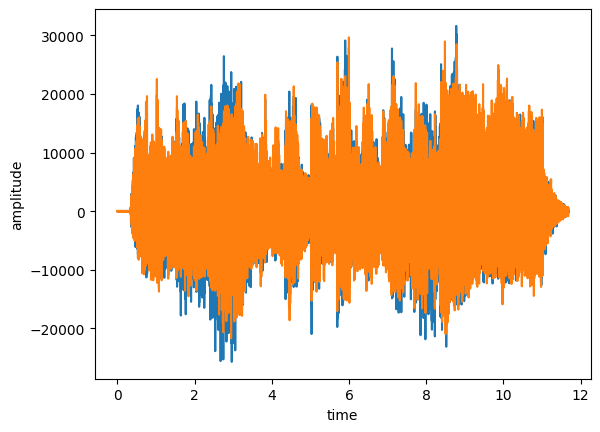

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

length = data.shape[0] / samplingrate

# 時間データ
t = np.linspace(0.0, length, data.shape[0])

# 横軸：時間データ、縦軸：データ
plt.plot(t, data)
plt.xlabel("time")
plt.ylabel("amplitude")

## ２－９ RDBデータ

### ２－９－１ データ

RDBデータはリレーショナルデータベース（RDB）で表現されるデータ形式である。基本的にはSQLという言語で操作ができ、一定の互換性がある。

種類としては、PostgreSQL、MySQL、SQLite3などがある。

＜SQLite3＞

* sakila-sqlite3
* MySQL開発チームが作成したデータベース構造のSQLite3版
* ビデオレンタルチェーンのデータベースモデル
* ライセンス：BSD 3-Clause License

  https://github.com/bradleygrant/sakila-sqlite3

### ２－９－２ 標準ライブラリ（SQLite3）

今回はデータベースについてはサンプルを利用する。そのため、1からのDB作成という手順は更新ドキュメント等で実施してほしい。

In [ ]:
import sqlite3

con = sqlite3.connect("drive/MyDrive/Colab Notebooks/DataScience/data/sakila_master.db")
cur = con.cursor()

for table in cur.execute(
    "SELECT name FROM sqlite_master WHERE type = 'table';"
):
  print(table[0])

actor
country
city
address
language
category
customer
film
film_actor
film_category
film_text
inventory
staff
store
payment
rental


In [ ]:
cur.execute("SELECT count(*) FROM film;")
cur.fetchall()

[(1000,)]

In [ ]:
limit = 5

for data in cur.execute(
    "SELECT FILM_ID, TITLE, RELEASE_YEAR, LENGTH, LAST_UPDATE"
    " FROM film LIMIT (?);",
    (limit,),
):
  print(data)

(1, 'ACADEMY DINOSAUR', '2006', 86, '2020-12-23 07:12:31')
(2, 'ACE GOLDFINGER', '2006', 48, '2020-12-23 07:12:31')
(3, 'ADAPTATION HOLES', '2006', 50, '2020-12-23 07:12:31')
(4, 'AFFAIR PREJUDICE', '2006', 117, '2020-12-23 07:12:31')
(5, 'AFRICAN EGG', '2006', 130, '2020-12-23 07:12:31')


In [ ]:
limit = 20

for data in cur.execute(
    "SELECT F.FILM_ID, F.TITLE, F.RELEASE_YEAR, F.LAST_UPDATE, C.NAME"
    " FROM film as F"
    " LEFT JOIN film_category as FC ON F.FILM_ID = FC.FILM_ID"
    " LEFT JOIN category as C ON FC.CATEGORY_ID = C.CATEGORY_ID"
    " ORDER BY F.TITLE"
    " LIMIT (?);",
    (limit,),
):
  print(data)

con.close()

(1, 'ACADEMY DINOSAUR', '2006', '2020-12-23 07:12:31', 'Documentary')
(2, 'ACE GOLDFINGER', '2006', '2020-12-23 07:12:31', 'Horror')
(3, 'ADAPTATION HOLES', '2006', '2020-12-23 07:12:31', 'Documentary')
(4, 'AFFAIR PREJUDICE', '2006', '2020-12-23 07:12:31', 'Horror')
(5, 'AFRICAN EGG', '2006', '2020-12-23 07:12:31', 'Family')
(6, 'AGENT TRUMAN', '2006', '2020-12-23 07:12:31', 'Foreign')
(7, 'AIRPLANE SIERRA', '2006', '2020-12-23 07:12:31', 'Comedy')
(8, 'AIRPORT POLLOCK', '2006', '2020-12-23 07:12:31', 'Horror')
(9, 'ALABAMA DEVIL', '2006', '2020-12-23 07:12:31', 'Horror')
(10, 'ALADDIN CALENDAR', '2006', '2020-12-23 07:12:31', 'Sports')
(11, 'ALAMO VIDEOTAPE', '2006', '2020-12-23 07:12:31', 'Foreign')
(12, 'ALASKA PHANTOM', '2006', '2020-12-23 07:12:31', 'Music')
(13, 'ALI FOREVER', '2006', '2020-12-23 07:12:31', 'Horror')
(14, 'ALICE FANTASIA', '2006', '2020-12-23 07:12:32', 'Classics')
(15, 'ALIEN CENTER', '2006', '2020-12-23 07:12:32', 'Foreign')
(16, 'ALLEY EVOLUTION', '2006', '20

### ２－９－３ pandasモジュール

pandasでRDBからデータを取得することができる。

In [ ]:
import sqlite3
import pandas as pd

con = sqlite3.connect("drive/MyDrive/Colab Notebooks/DataScience/data/sakila_master.db")

df = pd.read_sql(
    "SELECT F.FILM_ID, F.TITLE, F.RELEASE_YEAR, F.LAST_UPDATE, C.NAME"
    " FROM film as F"
    " LEFT JOIN film_category as FC ON F.FILM_ID = FC.FILM_ID"
    " LEFT JOIN category as C ON FC.CATEGORY_ID = C.CATEGORY_ID"
    " ORDER BY F.TITLE",
    con=con,
    parse_dates=["last_update"],
)
con.close()
df.head()

,film_id,title,release_year,last_update,name
0,1,ACADEMY DINOSAUR,2006,2020-12-23 07:12:31,Documentary
1,2,ACE GOLDFINGER,2006,2020-12-23 07:12:31,Horror
2,3,ADAPTATION HOLES,2006,2020-12-23 07:12:31,Documentary
3,4,AFFAIR PREJUDICE,2006,2020-12-23 07:12:31,Horror
4,5,AFRICAN EGG,2006,2020-12-23 07:12:31,Family


In [ ]:
df.dtypes

film_id                  int64
title                   object
release_year            object
last_update     datetime64[ns]
name                    object
dtype: object

## ２－１０ pickle形式

### ２－１０－１ データ

pickle形式は、Pythonのオブジェクトをそのままファイルに書き出せるPython専用の形式である。

注意点として、pickleオブジェクトには、システムを破壊するようなものを内部に入れることが可能である。よって、信頼できないpickle形式のデータは慎重に扱う必要がある。

また、pickle形式にはいくつかのプロトコルバージョンがある。下位互換は保たれているが、プロトコルVer.5でpickle化されたデータをプロトコルVer.4では読み込めない。

### ２－１０－２ DataFrameをpickle化

pickle化して、そのデータを取得するサンプルは以下である。

In [ ]:
import pickle
import pandas as pd

# 日付文字列をDateTime型に変換する関数(pandas=>2ではread_csvの引数でdate_formatを利用することでメソッドを定義しなくてもよい)
def date_parser(date_str):
    return pd.to_datetime(date_str, format='%Y年%m月')

df = pd.read_csv(
    "drive/My Drive/Colab Notebooks/DataScience/data/FEH_00200524_231202221704.csv",
    encoding="cp932",
    parse_dates=["時間軸（年月日現在）"],
    date_parser=date_parser,
    thousands=","
)

with open("drive/My Drive/Colab Notebooks/DataScience/data/csv-to-pickle.pickle", "wb") as f:
  pickle.dump(df, f)

df

,表章項目,人口,概算値,全国,時間軸（年月日現在）,年齢5歳階級,/男女別,男女計,男,女
0,人口【万人】,総人口,概算値,全国,2021-12-01,総数,NaN,12547,6099,6448
1,人口【万人】,総人口,概算値,全国,2021-12-01,0～4歳,NaN,437,224,214
2,人口【万人】,総人口,概算値,全国,2021-12-01,5～9歳,NaN,503,258,245
3,人口【万人】,総人口,概算値,全国,2021-12-01,10～14歳,NaN,535,274,261
4,人口【万人】,総人口,概算値,全国,2021-12-01,15～19歳,NaN,559,287,272
...,...,...,...,...,...,...,...,...,...,...
643,人口【万人】,総人口,概算値,全国,2023-11-01,（再掲）15歳未満,NaN,1416,725,691
644,人口【万人】,総人口,概算値,全国,2023-11-01,（再掲）15～64歳,NaN,7392,3750,3642
645,人口【万人】,総人口,概算値,全国,2023-11-01,（再掲）65歳以上,NaN,3623,1572,2051
646,人口【万人】,総人口,概算値,全国,2023-11-01,（再掲）うち75歳以上,NaN,2014,801,1212


In [ ]:
with open("drive/My Drive/Colab Notebooks/DataScience/data/csv-to-pickle.pickle", "rb") as f:
  df_loaded = pickle.load(f)

df_loaded

,表章項目,人口,概算値,全国,時間軸（年月日現在）,年齢5歳階級,/男女別,男女計,男,女
0,人口【万人】,総人口,概算値,全国,2021-12-01,総数,NaN,12547,6099,6448
1,人口【万人】,総人口,概算値,全国,2021-12-01,0～4歳,NaN,437,224,214
2,人口【万人】,総人口,概算値,全国,2021-12-01,5～9歳,NaN,503,258,245
3,人口【万人】,総人口,概算値,全国,2021-12-01,10～14歳,NaN,535,274,261
4,人口【万人】,総人口,概算値,全国,2021-12-01,15～19歳,NaN,559,287,272
...,...,...,...,...,...,...,...,...,...,...
643,人口【万人】,総人口,概算値,全国,2023-11-01,（再掲）15歳未満,NaN,1416,725,691
644,人口【万人】,総人口,概算値,全国,2023-11-01,（再掲）15～64歳,NaN,7392,3750,3642
645,人口【万人】,総人口,概算値,全国,2023-11-01,（再掲）65歳以上,NaN,3623,1572,2051
646,人口【万人】,総人口,概算値,全国,2023-11-01,（再掲）うち75歳以上,NaN,2014,801,1212


### ２－１０－３ pandasモジュール

In [ ]:
import pickle
import pandas as pd

# 日付文字列をDateTime型に変換する関数(pandas=>2ではread_csvの引数でdate_formatを利用することでメソッドを定義しなくてもよい)
def date_parser(date_str):
    return pd.to_datetime(date_str, format='%Y年%m月')

df = pd.read_csv(
    "drive/My Drive/Colab Notebooks/DataScience/data/FEH_00200524_231202221704.csv",
    encoding="cp932",
    parse_dates=["時間軸（年月日現在）"],
    date_parser=date_parser,
    thousands=","
)

df.to_pickle("drive/My Drive/Colab Notebooks/DataScience/data/df-to-pickle.pickle")

In [ ]:
df_loaded2 = pd.read_pickle("drive/My Drive/Colab Notebooks/DataScience/data/df-to-pickle.pickle")
df_loaded2

,表章項目,人口,概算値,全国,時間軸（年月日現在）,年齢5歳階級,/男女別,男女計,男,女
0,人口【万人】,総人口,概算値,全国,2021-12-01,総数,NaN,12547,6099,6448
1,人口【万人】,総人口,概算値,全国,2021-12-01,0～4歳,NaN,437,224,214
2,人口【万人】,総人口,概算値,全国,2021-12-01,5～9歳,NaN,503,258,245
3,人口【万人】,総人口,概算値,全国,2021-12-01,10～14歳,NaN,535,274,261
4,人口【万人】,総人口,概算値,全国,2021-12-01,15～19歳,NaN,559,287,272
...,...,...,...,...,...,...,...,...,...,...
643,人口【万人】,総人口,概算値,全国,2023-11-01,（再掲）15歳未満,NaN,1416,725,691
644,人口【万人】,総人口,概算値,全国,2023-11-01,（再掲）15～64歳,NaN,7392,3750,3642
645,人口【万人】,総人口,概算値,全国,2023-11-01,（再掲）65歳以上,NaN,3623,1572,2051
646,人口【万人】,総人口,概算値,全国,2023-11-01,（再掲）うち75歳以上,NaN,2014,801,1212


## ２－１１ parquet形式

### ２－１１－１ データ

parquet形式は、Apache Parquetプロジェクトで開発された表形式データを効率よく読み書きして高い圧縮率で保存できる形式である。Python以外でも利用可能であり、pandasでは、pyarrowパッケージを組み合わせることで利用できる。

```bash
pip install pyarrow
```

pickle形式との違いを下表にまとめる。

||pickle形式|parquet形式|
|---|---|---|
|バイナリ化できるもの|すべてのPythonオブジェクト|表形式データのみ|
|圧縮|なし|あり|
|バージョンの影響|あり|なし|

### ２－１１－２ pandasでの利用

In [ ]:
import pandas as pd

# 日付文字列をDateTime型に変換する関数(pandas=>2ではread_csvの引数でdate_formatを利用することでメソッドを定義しなくてもよい)
def date_parser(date_str):
    return pd.to_datetime(date_str, format='%Y年%m月')

df = pd.read_csv(
    "drive/My Drive/Colab Notebooks/DataScience/data/FEH_00200524_231202221704.csv",
    encoding="cp932",
    parse_dates=["時間軸（年月日現在）"],
    date_parser=date_parser,
    thousands=","
)

df.to_parquet("drive/My Drive/Colab Notebooks/DataScience/data/df-to-parquet.parquet")
df.head()

,表章項目,人口,概算値,全国,時間軸（年月日現在）,年齢5歳階級,/男女別,男女計,男,女
0,人口【万人】,総人口,概算値,全国,2021-12-01,総数,NaN,12547,6099,6448
1,人口【万人】,総人口,概算値,全国,2021-12-01,0～4歳,NaN,437,224,214
2,人口【万人】,総人口,概算値,全国,2021-12-01,5～9歳,NaN,503,258,245
3,人口【万人】,総人口,概算値,全国,2021-12-01,10～14歳,NaN,535,274,261
4,人口【万人】,総人口,概算値,全国,2021-12-01,15～19歳,NaN,559,287,272


In [ ]:
df_from_parquet = pd.read_parquet("drive/My Drive/Colab Notebooks/DataScience/data/df-to-parquet.parquet")
df_from_parquet.head()

,表章項目,人口,概算値,全国,時間軸（年月日現在）,年齢5歳階級,/男女別,男女計,男,女
0,人口【万人】,総人口,概算値,全国,2021-12-01,総数,NaN,12547,6099,6448
1,人口【万人】,総人口,概算値,全国,2021-12-01,0～4歳,NaN,437,224,214
2,人口【万人】,総人口,概算値,全国,2021-12-01,5～9歳,NaN,503,258,245
3,人口【万人】,総人口,概算値,全国,2021-12-01,10～14歳,NaN,535,274,261
4,人口【万人】,総人口,概算値,全国,2021-12-01,15～19歳,NaN,559,287,272


ここで、pickle形式とparquet形式の違いをみるためにサイズをそれぞれ確認する。

In [ ]:
import os

print(os.path.getsize("drive/My Drive/Colab Notebooks/DataScience/data/df-to-pickle.pickle"))
print(os.path.getsize("drive/My Drive/Colab Notebooks/DataScience/data/df-to-parquet.parquet"))

34118
14819


# 第３章 表形式データの加工

## ３－１ データの連結／結合

DataFrameをよく扱うため、この例を中心に考察する。

複数のデータを1つにまとめて処理する場合を考える。

|関数/メソッド|連結/結合|連結/結合方向|デフォルトの結合方法|キー|
|---|---|---|---|---|
|concat()関数|連結、結合|行方向、列方向|外部結合|インデックス|
|join()メソッド|結合|列方向|左外部結合|インデックス(デフォルト)、列|
|merge()関数|結合|列方向|内部結合|列(デフォルト)、インデックス|


In [ ]:
# データ準備

from IPython.display import display
import pandas as pd

df1 = pd.DataFrame(
    [
        [1, 10, 100],
        [2, 20, 200],
        [3, 30, 300],
    ],
    index = list("abc"),
    columns = list("ABC"),
)

df2 = pd.DataFrame(
    [
        [4, 40, 400],
        [2, 20, 200],
        [3, 30, 300],
    ],
    index = list("acd"),
    columns = list("ACD"),
)

display(df1, df2)

,A,B,C
a,1,10,100
b,2,20,200
c,3,30,300


,A,C,D
a,4,40,400
c,2,20,200
d,3,30,300


### ３－１－１ 連結

連結とは単にデータを行（縦）方向または列（横）方向に接続する処理を指す。DataFrameに対しての例をそれぞれ以下に示す。

In [ ]:
# concat()関数によるDataFrameの結合（元のインデックスは利用せず振り直し）
pd.concat([df1, df2], ignore_index=True)

,A,B,C,D
0,1,10.0,100,NaN
1,2,20.0,200,NaN
2,3,30.0,300,NaN
3,4,NaN,40,400.0
4,2,NaN,20,200.0
5,3,NaN,30,300.0


In [ ]:
# concat()関数によるDataFrameの結合２（元のインデックスをにラベル付け）
pd.concat([df1, df2], keys=["df1", "df2"])

A     B    C      D
df1 a  1  10.0  100    NaN
    b  2  20.0  200    NaN
    c  3  30.0  300    NaN
df2 a  4   NaN   40  400.0
    c  2   NaN   20  200.0
    d  3   NaN   30  300.0

### ３－１－２ 結合

結合とは、特定のキーを基に要素を取り出す。

In [ ]:
# concat()関数によるDataFrameの結合（outer）
pd.concat([df1, df2], axis=1)

,A,B,C,A,C,D
a,1.0,10.0,100.0,4.0,40.0,400.0
b,2.0,20.0,200.0,NaN,NaN,NaN
c,3.0,30.0,300.0,2.0,20.0,200.0
d,NaN,NaN,NaN,3.0,30.0,300.0


concat()関数のデフォルトの結合方法は「outer」である。

|結合方法|説明|
|---|---|
|inner|内部結合：結合対象のキーがすべて存在する要素を結合|
|outer|外部結合：結合対象のすべての要素を結合|

In [ ]:
# concat()関数によるDataFrameの結合２（inner）
pd.concat([df1, df2], axis=1, join="inner")

,A,B,C,A,C,D
a,1,10,100,4,40,400
c,3,30,300,2,20,200


In [ ]:
# join()メソッドによるDataFrameの結合１（left）
df3 = pd.DataFrame(
    [[1.3, 10.3], [2.3, 20.3]],
    index = list("ab"),
    columns = list("DE")
)

df1.join(df3)

,A,B,C,D,E
a,1,10,100,1.3,10.3
b,2,20,200,2.3,20.3
c,3,30,300,NaN,NaN


join()メソッドの結合方法は、デフォルトで左外部結合（left）である。

指定可能な方法は以下である。

|結合方法|説明|
|---|---|
|left|左外部結合|
|right|右外部結合|
|inner|内部結合：結合対象のキーがすべて存在する要素を結合|
|outer|外部結合：結合対象のすべての要素を結合|

In [ ]:
# join()メソッドによるDataFrameの結合２（inner）
df1.join(
    df2,
    how = "inner",
    lsuffix = "_df1",
    rsuffix = "_df2",
)

,A_df1,B,C_df1,A_df2,C_df2,D
a,1,10,100,4,40,400
c,3,30,300,2,20,200


In [ ]:
df4 = pd.DataFrame(
    [["a", 1.4, 10.4], ["b", 2.4, 20.4]],
    columns = ["key", "F", "G"],
)

display(df4, df1)

,key,F,G
0,a,1.4,10.4
1,b,2.4,20.4


,A,B,C
a,1,10,100
b,2,20,200
c,3,30,300


In [ ]:
df4.join(
    df1, on = "key"
)

,key,F,G,A,B,C
0,a,1.4,10.4,1,10,100
1,b,2.4,20.4,2,20,200


In [ ]:
# merge()関数によるDataFrameの結合１
df_merge1 = pd.merge(df1, df2, on = "A")
df_merge2 = pd.merge(df1, df2, on = "A", how = "left")
df_merge3 = pd.merge(df1, df2, left_on = "C", right_on = "D")

# ヘッダを変更
df_merge4 = pd.merge(df1, df2, on = "A", suffixes = ("_df1", "_df2"))


display(df_merge1, df_merge2, df_merge3, df_merge4,)

,A,B,C_x,C_y,D
0,2,20,200,20,200
1,3,30,300,30,300


,A,B,C_x,C_y,D
0,1,10,100,NaN,NaN
1,2,20,200,20.0,200.0
2,3,30,300,30.0,300.0


,A_x,B,C_x,A_y,C_y,D
0,2,20,200,2,20,200
1,3,30,300,3,30,300


,A,B,C_df1,C_df2,D
0,2,20,200,20,200
1,3,30,300,30,300


In [ ]:
# データがどちらに含まれているかを確認
pd.merge(
    df1,
    df2,
    on = "A",
    how = "outer",
    indicator = True
)

,A,B,C_x,C_y,D,_merge
0,1,10.0,100.0,NaN,NaN,left_only
1,2,20.0,200.0,20.0,200.0,both
2,3,30.0,300.0,30.0,300.0,both
3,4,NaN,NaN,40.0,400.0,right_only


In [ ]:
# すべての列を組み合わせて結合
pd.merge(
    df1,
    df2,
    how = "cross",
    suffixes = ("_df1", "_df2")
)

,A_df1,B,C_df1,A_df2,C_df2,D
0,1,10,100,4,40,400
1,1,10,100,2,20,200
2,1,10,100,3,30,300
3,2,20,200,4,40,400
4,2,20,200,2,20,200
5,2,20,200,3,30,300
6,3,30,300,4,40,400
7,3,30,300,2,20,200
8,3,30,300,3,30,300


merge()関数の注意点としては以下がある。

* キーとなる列に欠損値が含まれている場合、merge()関数は互いに欠損値であるキーもマッチさせる

In [ ]:
# 重複したキーの検証

df5 = pd.DataFrame(
    [
        [1, 10, 100],
        [2, 20, 200],
        [2, 20, 200],
    ],
    index = list("abc"),
    columns = list("ABC")
)
df5

,A,B,C
a,1,10,100
b,2,20,200
c,2,20,200


In [ ]:
pd.merge(
    df1,
    df5,
    on = "A",
    validate = "one_to_one"
)

MergeError: ignored

In [ ]:
pd.merge(
    df1,
    df5,
    on = "A",
    validate = "one_to_many"
)

,A,B_x,C_x,B_y,C_y
0,1,10,100,10,100
1,2,20,200,20,200
2,2,20,200,20,200


近い値での結合も可能である。merge_asof()関数で可能で、「tolerance」プロパティにて交差を指定する。

また、DataFrame結合時の関数／メソッドの選び方を以下にまとめる。

|関数/メソッド|選び方|
|---|---|
|concat()関数|DataFrameのインデックスがキーとして利用できる場合|
|join()メソッド|DataFrameのインデックスがキーとして利用でき、より複雑な条件で結合処理する場合|
|merge()関数|DataFrameの列をキーとして結合する場合|

## ３－２ データの変形

データはさまざまな形式で提供されるため、データを処理する前に、一般的には整然データに変形することが重要である。

### ３－２－１ ピボットとアンピボット

|項目|説明|
|---|---|
|ピボット|表形式データの列の値に基づいてデータを再形成する処理|
|アンピボット|ピボットされたデータを解除する処理|

In [ ]:
# データ
import pandas as pd

tips = pd.read_csv(
    "https://raw.githubusercontent.com/plotly/datasets/master/tips.csv",
    dtype = {
        "sex": "category",
        "smoker": "category",
        "day": "category",
        "time": "category",
    },
)

tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
# smokerとtimeの組み合わせの集計(aggfuncの指定がないため、平均で算出)

tips.pivot_table(
    index = "smoker",
    columns = "time",
    values = "total_bill"
)

time,Dinner,Lunch
smoker,,
No,20.095660,17.050889
Yes,21.859429,17.399130


In [ ]:
# aggfuncの利用で集計

tips.pivot_table(
    index = "smoker",
    columns = "time",
    values = "total_bill",
    aggfunc = "median"
)

time,Dinner,Lunch
smoker,,
No,18.265,15.95
Yes,20.695,16.00


In [ ]:
# 各行、列ごとの集計結果を追加

tips.pivot_table(
    index = "time",
    columns = "smoker",
    values = "size",
    margins = True
)

smoker,No,Yes,All
time,,,
Dinner,2.735849,2.471429,2.630682
Lunch,2.511111,2.217391,2.411765
All,2.668874,2.408602,2.569672


In [ ]:
# 複数の列、値を用いた集計

tips.pivot_table(
    index = ["day", "time"],
    columns = ["smoker", "sex"],
    values = ["size"],
    aggfunc = "count"
)

size                 
smoker          No         Yes     
sex         Female Male Female Male
day  time                          
Fri  Dinner      1    2      4    5
     Lunch       1    0      3    3
Sat  Dinner     13   32     15   27
     Lunch       0    0      0    0
Sun  Dinner     14   43      4   15
     Lunch       0    0      0    0
Thur Dinner      1    0      0    0
     Lunch      24   20      7   10

pivot_tableと同様な処理を行える関数として、「crosstab()関数」がある。

In [ ]:
# pivot_table

tips.pivot_table(
    index = ["day",],
    columns = ["time",],
    values = ["tip",],
    aggfunc = "count"
)

tip      
time Dinner Lunch
day              
Fri      12     7
Sat      87     0
Sun      76     0
Thur      1    61

In [ ]:
# crosstab

pd.crosstab(
    index = tips.loc[:, "day"],
    columns = tips.loc[:, "time"],
    values = tips.loc[:, "tip"],
    aggfunc = "count",
)

time,Dinner,Lunch
day,,
Fri,12,7
Sat,87,0
Sun,76,0
Thur,1,61


In [ ]:
# valuesを省略することで度数分布表になる

pd.crosstab(
    index = tips.loc[:, "day"],
    columns = tips.loc[:, "time"],
    normalize = True
)

time,Dinner,Lunch
day,,
Fri,0.049180,0.028689
Sat,0.356557,0.000000
Sun,0.311475,0.000000
Thur,0.004098,0.250000


In [ ]:
# アンピボットのデータ

pivoted_tips = tips.pivot_table(
    index = ["smoker"],
    columns = ["time"],
    values = "total_bill",
).reset_index()

pivoted_tips

time,smoker,Dinner,Lunch
0,No,20.095660,17.050889
1,Yes,21.859429,17.399130


In [ ]:
# アンピボット

pivoted_tips.melt(
    id_vars = ["smoker"],
    value_vars = ["Dinner", "Lunch"],
    var_name = ["time"],
    value_name = "total_bill",
)

,smoker,time,total_bill
0,No,Dinner,20.095660
1,Yes,Dinner,21.859429
2,No,Lunch,17.050889
3,Yes,Lunch,17.399130


アンピボットするための引数は以下である。

|引数名|説明|
|---|---|
|id_vars|列として識別する列名|
|value_vars|ピボットを解除する列名。指定しない場合、すべての列を使用する|
|var_name|value_varsに付ける列名|
|value_name|値の列に付ける別名。省略すると"value"が付けられる|

### ３－２－２ スタックとアンスタック

|項目|説明|
|---|---|
|スタック|複数列から構成されるデータを1次元に積み上げる処理|
|アンスタック|階層化されたインデックスを列に展開する処理|

In [ ]:
# スタック

tips_stacked = tips.stack()
tips_stacked.head(14)

0  total_bill     16.99
   tip             1.01
   sex           Female
   smoker            No
   day              Sun
   time          Dinner
   size               2
1  total_bill     10.34
   tip             1.66
   sex             Male
   smoker            No
   day              Sun
   time          Dinner
   size               3
dtype: object

In [ ]:
tips_stacked.index[: 14]

MultiIndex([(0, 'total_bill'),
            (0,        'tip'),
            (0,        'sex'),
            (0,     'smoker'),
            (0,        'day'),
            (0,       'time'),
            (0,       'size'),
            (1, 'total_bill'),
            (1,        'tip'),
            (1,        'sex'),
            (1,     'smoker'),
            (1,        'day'),
            (1,       'time'),
            (1,       'size')],
           )

In [ ]:
# アンスタック

tips_stacked.unstack()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.5,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.0,Female,Yes,Sat,Dinner,2
241,22.67,2.0,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
# MultiIndexのデータ

groupby_time = tips.groupby("time")[
    ["total_bill", "tip"]
].agg(
    ("mean", "median")
)

groupby_time.columns.names = (
    "value",
    "agg",
)

groupby_time

value  total_bill               tip       
agg          mean  median      mean median
time                                      
Dinner  20.797159  18.390  3.102670   3.00
Lunch   17.168676  15.965  2.728088   2.25

In [ ]:
groupby_time.stack(0)

agg                     mean  median
time   value                        
Dinner tip          3.102670   3.000
       total_bill  20.797159  18.390
Lunch  tip          2.728088   2.250
       total_bill  17.168676  15.965

In [ ]:
groupby_time.stack("agg")

value          total_bill       tip
time   agg                         
Dinner mean     20.797159  3.102670
       median   18.390000  3.000000
Lunch  mean     17.168676  2.728088
       median   15.965000  2.250000

In [ ]:
groupby_time_stack = groupby_time.stack("value")
groupby_time_stack

agg                     mean  median
time   value                        
Dinner tip          3.102670   3.000
       total_bill  20.797159  18.390
Lunch  tip          2.728088   2.250
       total_bill  17.168676  15.965

In [ ]:
groupby_time_stack.index.names

FrozenList(['time', 'value'])

In [ ]:
groupby_time_stack.unstack(1)

agg         mean            median           
value        tip total_bill    tip total_bill
time                                         
Dinner  3.102670  20.797159   3.00     18.390
Lunch   2.728088  17.168676   2.25     15.965

In [ ]:
groupby_time_stack.unstack("time")

agg              mean            median        
time           Dinner      Lunch Dinner   Lunch
value                                          
tip          3.102670   2.728088   3.00   2.250
total_bill  20.797159  17.168676  18.39  15.965

### ３－２－３ ダミー変数

ダミー変数とはカテゴリデータ（質的変数）をTrue(1)またはFalse(0)の2値に変換した変数である。

In [ ]:
# ダミー変数に変換（Series）

pd.get_dummies(tips.loc[:, "day"])

,Fri,Sat,Sun,Thur
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
239,0,1,0,0
240,0,1,0,0
241,0,1,0,0
242,0,1,0,0


In [ ]:
# ダミー変数に変換（DataFrame）
pd.get_dummies(tips, columns = ["smoker", "time"])

,total_bill,tip,sex,day,size,smoker_No,smoker_Yes,time_Dinner,time_Lunch
0,16.99,1.01,Female,Sun,2,1,0,1,0
1,10.34,1.66,Male,Sun,3,1,0,1,0
2,21.01,3.50,Male,Sun,3,1,0,1,0
3,23.68,3.31,Male,Sun,2,1,0,1,0
4,24.59,3.61,Female,Sun,4,1,0,1,0
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,Sat,3,1,0,1,0
240,27.18,2.00,Female,Sat,2,0,1,1,0
241,22.67,2.00,Male,Sat,2,0,1,1,0
242,17.82,1.75,Male,Sat,2,1,0,1,0


### ３－２－４ 要素の展開

要素の展開とは、ネストされた（各要素がリストやタプルなどの複数要素を持つ）データを展開して1次元のデータに変換する。

In [ ]:
# データ
import pandas as pd

students = pd.DataFrame(
    {
        "名前": ["寺田", "辻"],
        "履修科目": [
            ["国語", "英語", "数学"],
            ["英語", "物理"],
        ],
        "得点": [[78, 65, 89], [90, 82]]
    }
)
students

,名前,履修科目,得点
0,寺田,"[国語, 英語, 数学]","[78, 65, 89]"
1,辻,"[英語, 物理]","[90, 82]"


In [ ]:
# 要素を展開（Series）

students.loc[:, "得点"].explode()

0    78
0    65
0    89
1    90
1    82
Name: 得点, dtype: object

In [ ]:
# 要素を展開（DataFrame）

students.explode(["履修科目", "得点"])

,名前,履修科目,得点
0,寺田,国語,78
0,寺田,英語,65
0,寺田,数学,89
1,辻,英語,90
1,辻,物理,82


## ３－３ カテゴリデータの処理

質的変数をcategory型で処理することで以下の利点がある。

* カテゴリ上は存在するが、データには存在しない値の処理が可能
* 順序尺度の処理（比較、ソートなど）が可能
* グループ化処理が高速化

### ３－３－１ 尺度水準

データは質的変数（カテゴリ変数）、量的変数（連続変数）に分類できる。

|分類|説明|
|---|---|
|質的変数|離散的な値であり、数値では表現できない変数<br>**名義尺度**：血液型や性別など、和差、比率に意味がなく、比較ができない尺度<br>**順序尺度**：震度や企業格付けなど、比較できるが、和差、比率に意味がない尺度|
|量的変数|数や量で測れる変数<br>**間隔尺度**：気温や暦年など、和差に意味があるが比率には意味がない尺度<br>**比例尺度**：身長や重さなど、和差、比率に意味がある尺度|

### ３－３－２ カテゴリデータの生成

SeriesおよびDataFrameでは、コンストラクタの引数dtypeに「catagory」を指定することで生成することができる。

In [ ]:
import pandas as pd

survey_data = [
    "満足",
    "普通",
    "普通",
    "非常に不満",
    "不満",
]

survey_ser = pd.Series(
    survey_data,
    dtype = "category"
)

survey_ser

0       満足
1       普通
2       普通
3    非常に不満
4       不満
dtype: category
Categories (4, object): ['不満', '普通', '満足', '非常に不満']

### ３－３－３ カテゴリデータへの変換

Seriesをcategory型に変換することも可能である。

In [ ]:
pd.Series(survey_data).astype("category").dtype

CategoricalDtype(categories=['不満', '普通', '満足', '非常に不満'], ordered=False)

### ３－３－４ カテゴリデータの順序付け

カテゴリデータは、str型と同じ基準でソートすることが可能である。

In [ ]:
print(survey_ser.sort_values())
print()
print(survey_ser.value_counts())

4       不満
1       普通
2       普通
0       満足
3    非常に不満
dtype: category
Categories (4, object): ['不満', '普通', '満足', '非常に不満']

普通       2
不満       1
満足       1
非常に不満    1
dtype: int64


In [ ]:
# カテゴリデータの生成
rating = pd.CategoricalDtype(
    categories = [
        "非常に不満",
        "不満",
        "普通",
        "満足",
        "非常に満足",
    ],
    ordered = True,
)

new_survey_ser = pd.Series(survey_data, dtype = rating)
new_survey_ser

0       満足
1       普通
2       普通
3    非常に不満
4       不満
dtype: category
Categories (5, object): ['非常に不満' < '不満' < '普通' < '満足' < '非常に満足']

In [ ]:
# 各種データの取得

print(f"順序設定状態：{new_survey_ser.cat.ordered}")
print()
print(f"カテゴリ設定後のソート確認：\n{new_survey_ser.sort_values()}")
print()
print(f"カテゴリの先頭：{new_survey_ser.min()}")
print()
print(f"カテゴリの末尾：{new_survey_ser.max()}")
print()
print(f"各種度数：\n{new_survey_ser.value_counts()}")
print()
print(f"記述統計量：\n{new_survey_ser.describe()}")

順序設定状態：True

カテゴリ設定後のソート確認：
3    非常に不満
4       不満
1       普通
2       普通
0       満足
dtype: category
Categories (5, object): ['非常に不満' < '不満' < '普通' < '満足' < '非常に満足']

カテゴリの先頭：非常に不満

カテゴリの末尾：満足

各種度数：
普通       2
非常に不満    1
不満       1
満足       1
非常に満足    0
dtype: int64

記述統計量：
count      5
unique     4
top       普通
freq       2
dtype: object


欠損値が含まれていた場合の例を以下に示す。追加した情報が「-1」となる。

In [ ]:
import numpy as np

survey_data.append(np.nan)
missing_survey_data = pd.Series(survey_data, dtype = "category")
missing_survey_data.cat.codes

0    2
1    1
2    1
3    3
4    0
5   -1
dtype: int8

### ３－３－５ データの離散化によるカテゴリデータの生成

量的変数を離散化し質的変数に変換することが可能である。

In [ ]:
import pandas as pd
import numpy as np

rng = np.random.default_rng(1)
score = rng.integers(low = 0, high = 100, size = 10)
satisfaction = pd.cut(
    score,
    bins = [0, 20, 40, 60, 80, 101],
    right = False,
    labels = [
        "非常に不満",
        "不満",
        "普通",
        "満足",
        "非常に満足",
    ],
)

survey_df = pd.DataFrame({"satisfaction": satisfaction, "score": score})
survey_df

,satisfaction,score
0,普通,47
1,普通,51
2,満足,75
3,非常に満足,95
4,非常に不満,3
5,非常に不満,14
6,非常に満足,82
7,非常に満足,94
8,不満,24
9,不満,31


上記は以下を考慮して実装している。

* "bins"でビンの分割位置を指定
* "right"でビンの右端を含まないように設定

In [ ]:
print(f"データ型：\n{survey_df.dtypes}")
print("ソート状態：", survey_df.loc[:, "satisfaction"].cat.ordered)

データ型：
satisfaction    category
score              int64
dtype: object
ソート状態： True


離散化したデータはグループ処理が可能である。（例えば、平均など）

In [ ]:
survey_df.groupby("satisfaction").mean()

,score
satisfaction,
非常に不満,8.500000
不満,27.500000
普通,49.000000
満足,75.000000
非常に満足,90.333333


### ３－３－６ .catアクセサ

Seriesには、アクセサと呼ばれる各要素に簡潔にアクセスできる仕組みがある。この中で「.cat」はcategory型の要素にアクセスするアクセサである。

## ３－４ データのグループ化

## ３－５ 階層型インデックス（MultiIndex）

# 第４章 NumPyと数値データ

# 第５章 データの評価

# 第６章 時系列データの処理

# 第７章 テキスト情報の処理

## ７－１ Pythonを使った文字列処理

### ７－１－１ 正規表現

例としてルビ（ふりがな）を取り扱う処理を確認する。

ルビとは、以下のように《》で扱われている。

```python
text = "私は実に先生をこの雑踏《ざっとう》の間《あいだ》に見つけ出したのである。"
```

上記のような文字列を操作する際、正規表現を利用すると確実でわかりやすい。ただし、Pythonではなるべく正規表現を使わない方針がよくとられる。

In [ ]:
# 文字列内のルビの取得および除去
import re

text = "私は実に先生をこの雑踏《ざっとう》の間《あいだ》に見つけ出したのである。"
RE_RUBY = re.compile(r"《.+?》")

# ルビの取得
rubies = RE_RUBY.findall(text)
print(rubies)

# ルビの除去
ignored_text = RE_RUBY.sub("", text)
print(ignored_text)

['《ざっとう》', '《あいだ》']
私は実に先生をこの雑踏の間に見つけ出したのである。


### ７－１－２ 複数行のテキストデータ処理

複数行は1行単位で上記で指定した正規表現を利用して処理する。

In [ ]:
import re

RE_RUBY = re.compile(r"《.+?》")
result = []
with open("/content/drive/MyDrive/Colab Notebooks/DataScience/data/wagahaiwa_nekodearu.txt",
          "r",
          encoding = "shift-jis"
          ) as f:
    for line in f:
      if not line.strip():
        continue
      data = {}
      data["org"] = line
      data["length"] = len(line)
      rubies = RE_RUBY.findall(line)
      data["number-of-ruby"] = len(rubies)
      ignored_text = RE_RUBY.sub("", line)
      data["ignored-text"] = ignored_text
      data["ignored-length"] = len(ignored_text)
      result.append(data)
result[200]

{'org': '\u3000寒月は火鉢の灰を丁寧に掻《か》き馴《な》らして、俯向《うつむ》いてにやにや笑っていたが、やがて口を開く。極めて静かな調子である。\n',
 'length': 66,
 'number-of-ruby': 3,
 'ignored-text': '\u3000寒月は火鉢の灰を丁寧に掻き馴らして、俯向いてにやにや笑っていたが、やがて口を開く。極めて静かな調子である。\n',
 'ignored-length': 55}

上記をDataFrame化するには以下である。

In [ ]:
import pandas as pd

df = pd.DataFrame(result)
df

,org,length,number-of-ruby,ignored-text,ignored-length
0,吾輩は猫である\n,8,0,吾輩は猫である\n,8
1,夏目漱石\n,5,0,夏目漱石\n,5
2,----------------------------------------------...,56,0,----------------------------------------------...,56
3,【テキスト中に現れる記号について】\n,18,0,【テキスト中に現れる記号について】\n,18
4,《》：ルビ\n,6,0,《》：ルビ\n,6
...,...,...,...,...,...
2341,校正：渡部峰子（一）、おのしげひこ（二、五）、田尻幹二（三）、高橋真也（四、七、八、十、十一...,63,0,校正：渡部峰子（一）、おのしげひこ（二、五）、田尻幹二（三）、高橋真也（四、七、八、十、十一...,63
2342,1999年9月17日公開\n,13,0,1999年9月17日公開\n,13
2343,2018年2月5日修正\n,12,0,2018年2月5日修正\n,12
2344,青空文庫作成ファイル：\n,12,0,青空文庫作成ファイル：\n,12


In [ ]:
df.head(100)

,org,length,number-of-ruby,ignored-text,ignored-length
0,吾輩は猫である\n,8,0,吾輩は猫である\n,8
1,夏目漱石\n,5,0,夏目漱石\n,5
2,----------------------------------------------...,56,0,----------------------------------------------...,56
3,【テキスト中に現れる記号について】\n,18,0,【テキスト中に現れる記号について】\n,18
4,《》：ルビ\n,6,0,《》：ルビ\n,6
...,...,...,...,...,...
95,「一寸参堂仕り度《たく》候えども、大兄の消極主義に反して、出来得る限り積極的方針を以《もっ》...,99,4,「一寸参堂仕り度候えども、大兄の消極主義に反して、出来得る限り積極的方針を以て、此千古｜未曾...,82
96,［＃ここで字下げ終わり］\n,13,0,［＃ここで字下げ終わり］\n,13
97,なるほどあの男の事だから正月は遊び廻るのに忙がしいに違いないと、主人は腹の中で迷亭君に同意...,50,0,なるほどあの男の事だから正月は遊び廻るのに忙がしいに違いないと、主人は腹の中で迷亭君に同意...,50
98,［＃ここから２字下げ］\n,12,0,［＃ここから２字下げ］\n,12


日本語の文章を処理する場合、形態素解析技術を用いる。日本語は単語がスペースで区切られていません。単語数を調べるには、形態素解析などで単語分割が必要となる。他には、品詞を調べたり活用の原型を抽出したりする場合にも形態素解析は利用される。

Pythonから形態素解析を行うには、サードパーティ製パッケージを用いる。主なパッケージは以下である。

|パッケージ|URL|
|---|---|
|MeCab|https://taku910.github.io/mecab/|
|GiNZA|https://megagonlabs.github.io/ginza/|
|Janome|https://mocobeta.github.io/janome/|

## ７－２ pandasによるテキストデータ処理

### ７－２－１ テキストデータで扱うデータ型

pandasでテキストデータを扱う場合、以下のような型を利用する。

|データ型|説明|
|---|---|
|object|numpy.ndarrayのnumpy.object型|
|string|pandas.StringDtype拡張型|

公式ドキュメントではstring型の利用を推奨している。

* object型は文字列型ではないデータ型も含まれるが、string型は文字列のみとなる
* DataFrameからstring型の列を抽出できる（select_dtype()メソッド）
* コードを読む際にstring型が明記されることによりデータ型が明確になる

In [ ]:
import pandas as pd

object_ser = pd.Series(["spam", "ham"])
print(object_ser.dtype)

object


データ型を指定するには以下のようにする。

In [ ]:
string_ser = pd.Series(["spam", "ham"], dtype = pd.StringDtype())
#string_ser = pd.Series(["spam", "ham"], dtype = "string")
print(string_ser.dtype)

string


または、データ変換を実施する。

In [ ]:
object_ser.astype(pd.StringDtype())

0    spam
1     ham
dtype: string

### ７－２－２ 各種操作

Seriesにはアクセサと呼ばれる各要素に簡潔にアクセスする仕組みがある。

In [ ]:
import pandas as pd

s = pd.Series(
    ["Spam", "Ham", None, "Egg"],
    dtype = pd.StringDtype(),
)

上記のデータに対して、以下のことが可能となる。

|操作|方法|
|---|---|
|大文字変換|upper()メソッド|
|小文字変換|lower()メソッド|
|文字変換(正規表現)|replace()メソッド|
|文字連結|cat()メソッド|
|文字列分割|split()メソッド<br>extract()メソッド|

In [ ]:
# 大文字
print(s.str.upper())
print("------------------")

# 小文字
print(s.str.lower())
print("------------------")

# 正規表現
print(s.str.replace(r"g+", "G", regex = True))
print("------------------")

# 文字連結（カンマ区切りで結合）
print(s.str.cat(sep = ",", na_rep = "****"))
print("------------------")

# 文字列分割
c = pd.Series(["a,A", "b,B", "c-C"])
print(c.str.split(","))
print("------------------")
c.str.extract(r"(.*)[,-](.*)", expand = True)

0    SPAM
1     HAM
2    <NA>
3     EGG
dtype: string
------------------
0    spam
1     ham
2    <NA>
3     egg
dtype: string
------------------
0    Spam
1     Ham
2    <NA>
3      EG
dtype: string
------------------
Spam,Ham,****,Egg
------------------
0    [a, A]
1    [b, B]
2     [c-C]
dtype: object
------------------


,0,1
0,a,A
1,b,B
2,c,C


Series同士の結合は、インデックスキーとして2つのSeriesの文字列を結合する。

|操作|説明|
|---|---|
|left|左部結合（デフォルト）|
|right|右部結合|
|outer|外部結合|
|inner|内部結合|


In [ ]:
# Series同士の結合
print(
    s.str.cat(
       pd.Series(["a", "b"]),
       sep = ",",
       join = "right",
    )
)

0    Spam,a
1     Ham,b
dtype: string


# 第８章 画像データの処理

# 第９章 グラフデータの処理

## ９－１ グラフとNetworkX

グラフ構造は、モノとモノとのつながりを表現するデータ構造である。



### ９－１－１ グラフの基本

グラフを構成するのは、ノード（node）とエッジ（edge）である。Webページの例では、Webページがノードで、ハイパーリンクがエッジである。ノードは、頂点（vertex）や節点などの別名がある。エッジは辺と訳されることが多く、このほかに弧（arc）、リンク（link）、枝（branch）もノードの接続関係を表現する用語として使われる。

### ９－１－２ NetworkX入門

Pythonを利用してグラフを扱うプログラムを作りたい場合、NetworkXが便利である。

NetworkXは、以下でインストールする。

```python
pip install networkx
```

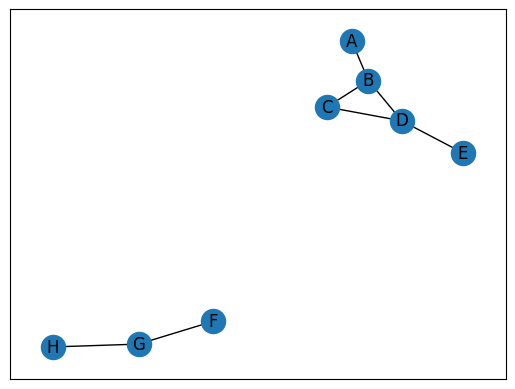

In [ ]:
# NetworkXの利用
import networkx as nx

graph = nx.Graph()
graph.add_edge("A", "B")

graph.add_edges_from(
    [
        ("B", "C"),
        ("B", "D"),
        ("C", "D"),
        ("D", "E"),
        ("G", "F"),
        ("G", "H"),
    ]
)

nx.draw_networkx(graph)

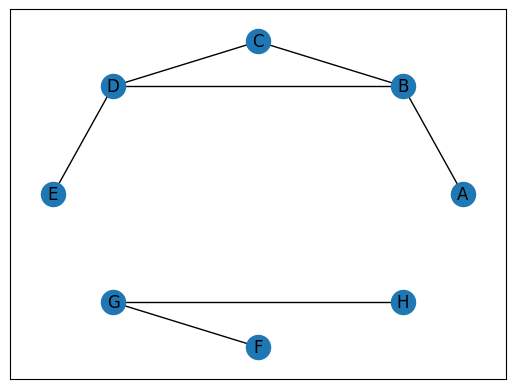

In [ ]:
# グラフのノードをできるだけ円周上に配置するcircular_layout()関数を使った例
nx.draw_networkx(graph, pos = nx.circular_layout(graph))

グラフを描画するアルゴリズムには、ノードを配置する計算にランダムな要素が含まれている。そのため、描画するたびに結果が変わる。

以下のサイトが参考となる。

https://networkx.org/documentation/stable/reference/drawing.html#module-networkx.drawing.layout

### ９－１－３ NetworkXを使ったグラフの解析

NetworkXを利用することでグラフの様々な特徴を解析することが可能

In [ ]:
# グラフのすべてのノード
graph.nodes()

NodeView(('A', 'B', 'C', 'D', 'E', 'G', 'F', 'H'))

In [ ]:
# グラフのすべてのエッジ
graph.edges()

EdgeView([('A', 'B'), ('B', 'C'), ('B', 'D'), ('C', 'D'), ('D', 'E'), ('G', 'F'), ('G', 'H')])

In [ ]:
# 隣接するノードを取得
graph["C"]

AtlasView({'B': {}, 'D': {}})

グラフを使ってデータを表現する場合、ノード、エッジに情報を追加することがよくある。例えば、全国の空港をノードにし、2つの空港間に定期航空便がある場合、それらをエッジで結んでグラフを作成する。エッジに所要時間を付加すると、これはエッジの属性値になる。エッジにこのような数値を割り当てるとエッジに重みを付けられる。

In [ ]:
graph["A"]["B"]

{}

In [ ]:
for s, t in graph.edges():
  graph[s][t]["value"] = 10

graph["A"]["B"]

{'value': 10}

In [ ]:
# エッジの総数
graph.size()

7

In [ ]:
# 各エッジのvalueを合計した値の取得
graph.size(weight="value")

70.0

ノードの属性も操作することが可能である。

In [ ]:
# すべてのノードのcolor属性をgrayにする
for node in graph.nodes():
  graph.nodes[node]["color"] = "gray"

graph.nodes["A"]

{'color': 'gray'}

NetworkXには、グラフ構造を取り扱うのに便利な関数が多数用意されている。

In [ ]:
# 2つのノード間に道があるかの確認
nx.has_path(graph, "A", "E")

True

In [ ]:
nx.has_path(graph, "A", "G")

False

In [ ]:
# 最短経路
for path in nx.all_shortest_paths(graph, source = "A", target = "E"):
  print(path)

['A', 'B', 'D', 'E']


In [ ]:
# 現在のグラフが連結可能かを確認
nx.is_connected(graph)

False

In [ ]:
# 現在のグラフの状態確認
cc_list = list(
    sorted(
        nx.connected_components(graph),
        key = lambda x: -len(x),
    )
)

cc_list

[{'A', 'B', 'C', 'D', 'E'}, {'F', 'G', 'H'}]

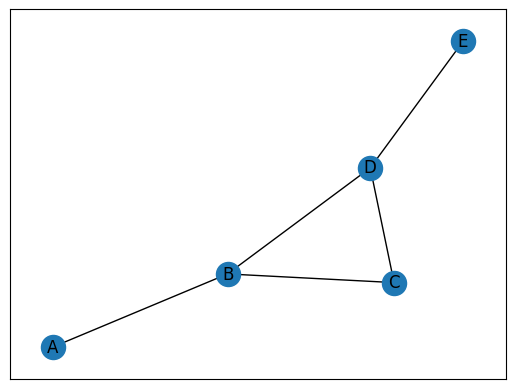

In [ ]:
# 上記の情報で再描画（1つ目）
graph_0 = graph.subgraph(cc_list[0])
nx.draw_networkx(graph_0)

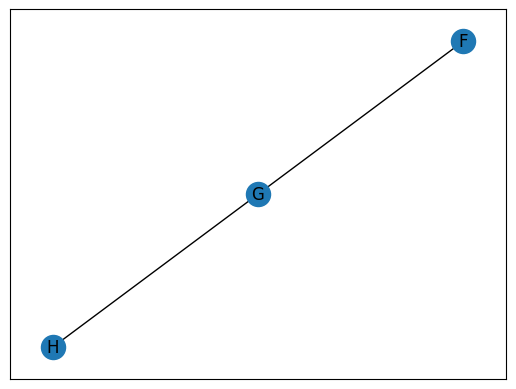

In [ ]:
# 上記の情報で再描画（2つ目）
graph_1 = graph.subgraph(cc_list[1])
nx.draw_networkx(graph_1)

### ９－１－４ pyvisを利用したグラフ描画

NetworkXを利用した描画では、Matplotlibを利用した静的な画像が生成されるため、一度描画されるとノードの位置を動かすことができない。そのため、NetworkXのグラフオブジェクトをそのまま描画できる「pyvis」を利用する。

```python
pip install pyvis
```

In [ ]:
# pyvis描画
from pyvis.network import Network

#net = Network(notebook=True, cdn_resources="in_line")
net = Network(notebook=True, cdn_resources='remote')
net.from_nx(graph)

net.show("pyvis_graph.html")

pyvis_graph.html


### ９－１－５ グラフのためのファイル形式

ノードの数が数百以上になると、NetworkXやpyvisを使った可視化ではグラフの構造を把握することが難しい。このような場合、専用ソフトウェアを利用する。

|ツール名|概要|
|---|---|
|Gephi|https://gephi.org/|
|Cytoscape|https://cytoscape.org/|

NetworkXで扱っているグラフをこうした別のアプリケーションに渡す場合、共通フォーマットで出力する必要があり、これにはいくつか種類がある。

例としてGML(Graph Modeling Language)形式で説明する。

In [ ]:
# GML形式のファイルを出力
nx.write_gml(graph, "graph.gml")

出力したファイルはテキスト形式のファイルのため、中身を容易に確認できる。GML形式の他には、XMLを利用したGEXE、GraphMLといったファイル形式も利用される。

## ９－２ 実践的なグラフデータの解析

### ９－２－１ データの準備

動画配信サービスのNetflixで提供されている映画やドラマのデータを利用する。

データは以下からダウンロードする(kaggleのアカウントが必要)。

https://www.kaggle.com/datasets/victorsoeiro/netflix-tv-shows-and-movies

In [ ]:
#
import pandas as pd

titles_all = pd.read_csv("drive/My Drive/Colab Notebooks/DataScience/data/titles.csv", index_col="id")
print(titles_all.shape)
titles_all.head()

(5850, 14)


,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
id,,,,,,,,,,,,,,
ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600


上記のデータを解析の都合上小規模にするため加工する。

In [ ]:
titles = titles_all.loc[
    (titles_all["type"] == "MOVIE") &
    (titles_all["release_year"] > 1990) &
    (titles_all["release_year"] < 2000)
]

titles.shape

(91, 14)

出演者の情報は、credits.csvファイルに記載があるため読み込む。

In [ ]:
actors = pd.read_csv("drive/My Drive/Colab Notebooks/DataScience/data/credits.csv")
print(actors.shape)
actors.head()

(77801, 5)


,person_id,id,name,character,role
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR
1,14658,tm84618,Jodie Foster,Iris Steensma,ACTOR
2,7064,tm84618,Albert Brooks,Tom,ACTOR
3,3739,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR
4,48933,tm84618,Cybill Shepherd,Betsy,ACTOR


id列に作品の情報としてtitlesのインデックスが入る。これらの2つのデータを利用して次の条件を満たすグラフを作成する。

1. ノードは1991年～1999年の映画タイトル
1. 2つの映画に共通して出演している俳優がいる場合エッジを作成
1. エッジの属性値は2つの作品に共通して出演している俳優の数（weight）

上記のグラフを構築するため、データを前処理する。

In [ ]:
#
import itertools

# actorsのデータを俳優に限定し作品でグループ化
actors_gr = actors.groupby("role").get_group("ACTOR").groupby("id")

# 2つの映画のIDとそれらに共通して出演している俳優の数を保持
movie_a_b_list = []

all_movies = set(actors_gr.groups.keys())

for movie_a, movie_b in itertools.combinations(titles.index, 2):
  if movie_a in all_movies and movie_b in all_movies:
    set_a = set(actors_gr["person_id"].get_group(movie_a))
    set_b = set(actors_gr["person_id"].get_group(movie_b))

    # 共通して出演している俳優の数
    n = len(set_a & set_b)
    if n > 0:
      movie_a_b_list.append([movie_a, movie_b, n])

actor_overlaps = pd.DataFrame(
    movie_a_b_list,
    columns = [
        "movie_A",
        "movie_B",
        "weight",
    ],
)

actor_overlaps

,movie_A,movie_B,weight
0,tm107744,tm192037,1
1,tm107744,tm116655,1
2,tm107744,tm116488,1
3,tm107744,tm44402,1
4,tm107744,tm191387,1
...,...,...,...
153,tm256669,tm334788,1
154,tm256669,tm314602,1
155,tm64729,tm184224,1
156,tm44776,tm117840,2


### ９－２－２ グラフの構築

1行が1つのエッジになっているpandasのDataFrameがあると、NetworkXのオブジェクトを作成しやすい。

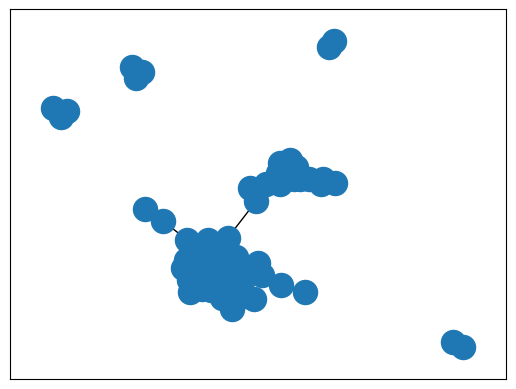

In [ ]:
import networkx as nx

all_movie_graph = nx.from_pandas_edgelist(
    actor_overlaps,
    source="movie_A",
    target="movie_B",
    edge_attr="weight",
)

nx.draw_networkx(
    all_movie_graph,
    with_labels=False
)

NetworkXを使った描画では、ノードが重なってしまい見づらいため、pyvisを利用する。また、1つの大きな連結成分と、少数のノードで構成されていると思われるため、最も多くのノードを含む最大の連結成分を取り出す。

In [ ]:
from pyvis.network import Network

largest_component = max(
    nx.connected_components(all_movie_graph),
    key=len,
)
movie_graph = all_movie_graph.subgraph(largest_component)

# 描画
nt = Network(
    height="800px",
    width="800px",
    notebook=True,
    cdn_resources="in_line",
)

nt.from_nx(movie_graph)
nt.show("movie_graph.html")

movie_graph.html


In [ ]:
from IPython.display import HTML

HTML(filename="/content/movie_graph.html")

図を確認した結果、1つの連結成分からなるグラフだが、全体として大きく分けて2つの部分から構成されているとわかる。国の情報で色分けするためまずはタイトルごとの国の情報を確認する。

In [ ]:
titles["production_countries"].value_counts().head()

['US']          44
['IN']          19
['FR', 'EG']     3
['GB']           3
['JP', 'US']     2
Name: production_countries, dtype: int64

In [ ]:
from pyvis.network import Network

largest_component = max(
    nx.connected_components(all_movie_graph),
    key=len,
)
movie_graph = all_movie_graph.subgraph(largest_component)

for node in movie_graph:
  row = titles.loc[node]
  movie_graph.nodes[node][
      "title"
  ] = f"{row['title']} {row['production_countries']}"
  countries = eval(row["production_countries"])

  # 国ごとの色分け
  if len(countries) == 1:
    if countries[0] == "US":
      movie_graph.nodes[node]["color"] = "blue"
    if countries[0] == "IN":
      movie_graph.nodes[node]["color"] = "red"
    else:
      movie_graph.nodes[node]["color"] = "gray"
  else:
    movie_graph.nodes[node]["color"] = "green"

# 描画
nt = Network(
    height="800px",
    width="800px",
    notebook=True,
    cdn_resources="in_line",
)

nt.from_nx(movie_graph)
nt.show("colored_movie_graph.html")

colored_movie_graph.html


In [ ]:
from IPython.display import HTML

HTML(filename="/content/colored_movie_graph.html")

### ９－２－３ ノードの特徴定量化

グラフの規模が大きくなると可視化しても特徴を把握するのは難しい。この問題は、ノードの特徴を定量化する手法を使うことで、ある程度解決可能である。

In [ ]:
# ノードのリスト作成
node_list = list(movie_graph.nodes())

# グラフに含まれるタイトルだけのDataFrame
titles_in_graph = titles.loc[node_list, :]

# 次数中心性の計算
deg_cent = nx.degree_centrality(movie_graph)
titles_in_graph["degree_centrality"] = [deg_cent[node] for node in node_list]

# 出力列を指定
cols = [
    "title",
    "production_countries",
    "degree_centrality",
]

titles_in_graph[cols].sort_values("degree_centrality", ascending=False)

,title,production_countries,degree_centrality
id,,,
tm67635,Kuch Kuch Hota Hai,['IN'],0.174603
tm111163,Eraser,"['US', 'CA']",0.174603
tm12876,Bombay,['IN'],0.158730
tm116488,Natural Born Killers,['US'],0.142857
tm192037,Starship Troopers,['US'],0.142857
...,...,...,...
tm21911,Sam Kinison: Live in Vegas,['US'],0.015873
tm53991,Big Daddy,['US'],0.015873
tm192769,Vegas Vacation,['US'],0.015873


グラフの中から、ランダムに2つのノードを取り出して、これらの最短経路を調べるとする。2つのノードが隣接していなければ、スタートとゴール以外に経由するノードが1つ以上ある。スタートとゴールを変更して経由地点を調べる作業を繰り返すと、経由地点として頻繁に登場するノードが浮かび上がる可能性がある。電車の路線図をグラフに見立てるとどこに行くにも乗り換えに利用するターミナル駅に相当する。

ノードのこのような特徴を定量化する中心性の指標が、媒介中心性である。

$$
C_B(i) = \frac{\sum_{j<k} \frac{g_{jk}(v_i)}{g_{jk}}}{\frac{(N-1)(N-2)}{2}}
$$

＜簡単な数式の解説＞

$\frac{g_{jk}(v_i)}{g_{jk}}$は、ノード$j$と$k$を結ぶ最短経路の内、注目しているノード$i$を通る経路がどれくらいの割合で含まれているかを示す数値である。

$\frac{(N-1)(N-2)}{2}$は、注目しているノード$i$以外の任意の2つのノードの組み合わせの数である。

媒介中心性の最大値が1になるように、足し合わせた結果を$\frac{(N-1)(N-2)}{2}$で割る。

In [ ]:
# 媒介中心性を計算
bet_cent = nx.betweenness_centrality(movie_graph)

# 媒介中心性のデータを追加
titles_in_graph["betweenness_centrality"] = [bet_cent[node] for node in node_list]

# 出力
cols = [
    "title",
    "production_countries",
    "betweenness_centrality",
]

titles_in_graph[cols].sort_values(
    "betweenness_centrality",
    ascending=False,
)

,title,production_countries,betweenness_centrality
id,,,
tm191772,Seven Years in Tibet,['US'],0.452613
tm334788,Yodha,['IN'],0.431857
tm107744,Mission: Impossible,['US'],0.236631
tm15897,Se7en,['US'],0.215524
tm192037,Starship Troopers,['US'],0.205478
...,...,...,...
tm113513,Dumb and Dumber,['US'],0.000000
tm10811,Heavy,['US'],0.000000
tm53991,Big Daddy,['US'],0.000000


インド、米国のクラスターをつなぐエッジの両端にある2つのノードの媒介中心性が高いことがわかる。

# 第１０章 地理空間データの処理

## １０－１ 地理空間データの概要

### １０－１－１ 地理空間データとは

地理空間データは、空間上の特定の地点または区域の位置を示す情報（位置情報）およびそれに関連付けられた様々な情報を持つデータである。

* 土地利用図（自然、災害、経済活動 など）
* 地質図
* 主題図（ハザードマップ など）
* 都市計画図
* 地形図
* 統計情報
* 空中写真、衛星画像

### １０－１－２ GIS（地理情報システム）

GISは、Geographic Information Systemの略で、地理情報システムとも呼ばれる。地理的位置から空間データ（位置に関する情報を持ったデータ）を加工し、分析や判断をするための技術である。

＜参考（日本の動き）＞

* 1996年 「国土空間データ基盤の整備及びGISの普及の促進に関する長期計画」を決定
* 2007年 GISを高度に活用できる社会の実現のため、地理空間情報活用推進基本法が制定

### １０－１－３ CRS（座標参照系）

CRSはCoordinate Reference Systemの略で、座標参照系とも呼ばれる。地球を平面上の位置に表現するためのルールである。

|座標系|説明|
|---|---|
|地理座標系|地球の重心付近を原点とした緯度経度と角度で位置を表現|
|投影座標系|地球のある範囲を平面に投影し、ある原点からの距離を表現|

距離や面積を求める場合、投影座標系を用いる。

GISでは、座標系や測地系、投影法など様々な要素を組み合わせて利用する。SRID(Spatial Reference System Identifiers)は、これらの要素の集合体として識別するためのコード体系である。このコード体系の事実上の標準として**EPSGコード**が利用される。

### １０－１－４ データ形式

地理空間データのデータ形式は、主に、ベクターデータとラスターデータに分類される。

#### ベクターデータ

GISにおけるベクターデータとは、座標（点）の情報を基に以下の要素を構成するデータである。

|要素|説明|
|---|---|
|ポイント|点で位置情報を表現<br>駅や県庁所在地など、狭い範囲の位置を示す場合に利用|
|ライン|線で位置情報を表現<br>道路や河川など、連続した位置を示す場合に利用、等高線や区域などを分割する場合に利用|
|ポリゴン|面（立体）で位置情報を表現<br>区画や境界などに囲まれた領域を示す場合に利用|

#### ラスターデータ

GISにおけるラスターデータとは、行と列で構成されたセル（ピクセル）ごとに値を持った地物（樹木や建物などの自然／人工物）を表現する画像データである。品質は画像の解像度に依存し、拡大／縮小すると劣化するが、描画速度を高速にできる利点がある。

### １０－１－５ GISで利用する主なライブラリ

|ライブラリ|概要|
|---|---|
|GDAL|多数のファイル形式に対応したベクターデータとラスターデータを変換するライブラリ|
|Fiona|ベクターデータの読み込み／書き込みに対応したライブラリ|
|GeoPandas|地理空間データをpandasで操作できるライブラリ|
|Rasterio|ラスターデータの読み込み／書き込みに対応したライブラリ|
|Shapely|地理空間データを操作／解析するライブラリ|
|pyproj|座標参照系を別の座標に変換するライブラリ|
|Geopy|ジオコーディング（住所や地名などから地理座標に変換）を行なうためのライブラリ|
|Folium|地理空間データを地図に投影して可視化を行なうライブラリ|

## １０－２ 地理空間データのファイル形式と読み込み

### １０－２－１ GeoJSON

GeoJSONは、地理空間データを扱えるベクターデータで、JSON形式のデータ形式である。地理空間データを次のgeometory型で記述する。

* Point
* LineString
* Polygon
* MultiPoint
* MultiLineString

GeoJSON形式は、IETF（the Internet Enginnering Task Force）が2016年8月にRFC7946として策定したデータ形式である。座標参照系はWGS84で、経度・緯度は10進法度単位（度、分、秒を10進数に換算した値）を使用する。

In [ ]:
# geojson形式の読み込み（shapelyモジュール利用）
# from_geojson()では、propertiesは読み込まない

from shapely import from_geojson

geojson = """{
  "type": "FeatureCollection",
  "features": [
    {
      "type": "Feature",
      "properties": {
        "name": "yurakucho"
      },
      "geometry": {
        "type": "Point",
        "coordinates": [
          35.675056,
          139.763333
        ]
      }
    },
    {
      "type": "Feature",
      "properties": {
        "name": "tokyo-kanda"
      },
      "geometry": {
        "type": "LineString",
        "coordinates": [
          [
            35.681111,
            139.766667
          ],
          [
            35.691667,
            139.770833
          ]
        ]
      }
    }
  ]
}"""

geo_collection = from_geojson(geojson)
type(geo_collection)

shapely.geometry.collection.GeometryCollection

In [ ]:
# JSON形式出力

from shapely import to_geojson

# インデックスを調整して見やすくする
print(to_geojson(geo_collection, indent=4))

{
    "type": "GeometryCollection",
    "geometries": [
        {
            "type": "Point",
            "coordinates": [
                35.675056,
                139.763333
            ]
        },
        {
            "type": "LineString",
            "coordinates": [
                [
                    35.681111,
                    139.766667
                ],
                [
                    35.691667,
                    139.770833
                ]
            ]
        }
    ]
}


geojson形式のデータを専用のpandas形式で読み込むことができる。

In [ ]:
from io import StringIO
import geopandas as gpd

geojson_gdf = gpd.read_file(StringIO(geojson))
geojson_gdf

,name,geometry
0,yurakucho,POINT (35.67506 139.76333)
1,tokyo-kanda,"LINESTRING (35.68111 139.76667, 35.69167 139.7..."


「geometry」列の要素は、ShapelyのGeometricオブジェクトである。Jupyter（ノートブック）のREPLではレンダリングして描画される。

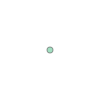

In [ ]:
geojson_gdf.loc[0, "geometry"]

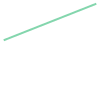

In [ ]:
geojson_gdf.loc[1, "geometry"]

JSON形式での出力には、to_json()メソッドを利用する。

また、GeoJSONファイルに書き出すためには、to_file()メソッドを利用する。

In [ ]:
print(geojson_gdf.to_json(indent=4))

{
    "type": "FeatureCollection",
    "features": [
        {
            "id": "0",
            "type": "Feature",
            "properties": {
                "name": "yurakucho"
            },
            "geometry": {
                "type": "Point",
                "coordinates": [
                    35.675056,
                    139.763333
                ]
            }
        },
        {
            "id": "1",
            "type": "Feature",
            "properties": {
                "name": "tokyo-kanda"
            },
            "geometry": {
                "type": "LineString",
                "coordinates": [
                    [
                        35.681111,
                        139.766667
                    ],
                    [
                        35.691667,
                        139.770833
                    ]
                ]
            }
        }
    ]
}


In [ ]:
geojson_gdf.to_file(
    "/content/drive/MyDrive/Colab Notebooks/DataScience/data/yurakucho-kanda.geojson",
    driver="GeoJSON"
)

### １０－２－２ シェープファイル

シェープファイル（Shapefile）は、米国Esri社（Environmental Systems Research Institute, Inc.）が策定したベクターデータで、GISで広く利用されているデータ形式である。シェープファイルは、下表のデータを1つのデータセットとして扱う。これらのファイルがZIP形式でまとめられて提供される場合がある。

|拡張子|説明||
|---|---|---|
|.shp|地理空間データの情報を格納|必須|
|.shx|地理空間データのインデックスを格納|必須|
|.dbf|地理空間データの属性情報を格納|必須|
|.prj|地形情報の座標参照系の定義を格納|推奨|
|.sbn .sbx|空間インデックスを格納|推奨|

In [ ]:
shapefile_gdf = gpd.read_file("/content/drive/MyDrive/Colab Notebooks/DataScience/data/yurakucho")
shapefile_gdf

NameError: name 'gpd' is not defined

### １０－２－３ GeoTIFF

GeoTIFFは、GISで利用されるラスターデータのファイル形式である。地理空間情報を含むメタデータが付いたTIFF（Tagged Image File Format）画像ファイルの形式で、その仕様はOGC GeoTIFF Standardによって定義されれている。

ここで、国土交通省「国土数値情報ダウンロードサービス」が公開する、「土地利用細分メッシュ（ラスタ版）データ（平成26年度）」からダウンロードしたGeoTIFFファイルを読み込む。

<ダウンロード>

https://nlftp.mlit.go.jp/ksj/gml/datalist/KsjTmplt-L03-b_r.html

In [ ]:
import rasterio

dataset = rasterio.open("/content/drive/MyDrive/Colab Notebooks/DataScience/data/L03-b-14_5237.tif")
# 画像データの四隅の座標を取得
dataset.bounds

BoundingBox(left=137.0, bottom=34.6666666336, right=138.0, top=35.3333333)

In [ ]:
# データセットの座標系（CRS）を確認
dataset.crs

CRS.from_wkt('GEOGCS["JGD2000",DATUM["Japanese_Geodetic_Datum_2000",SPHEROID["GRS 1980",6378137,298.257221999999,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6612"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4612"]]')

ラスターデータは多次元のデータで、バンド（レイヤー）と呼ばれる2次元のデータが含まれる。複数のバンドを持つラスターデータもあり、バンドには1から順番にインデックス番号が振られる。

array([[ 50,  50,  50, ...,  50,  50,  60],
       [ 60,  60,  60, ...,  60,  50,  60],
       [ 60,  60,  60, ...,  50,  50,  50],
       ...,
       [150, 150, 140, ...,  10,  10,  10],
       [150, 150, 140, ...,  20,  20,  20],
       [150, 150, 150, ...,  20,  20,  20]], dtype=uint8)
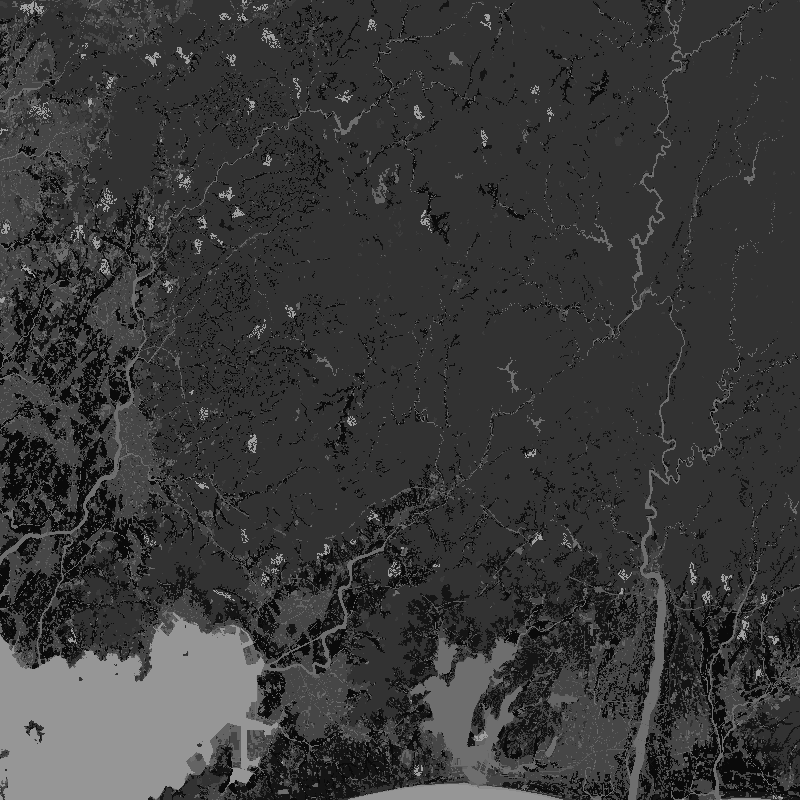

In [ ]:
# バンドのラスターデータ
dataset.read(1)

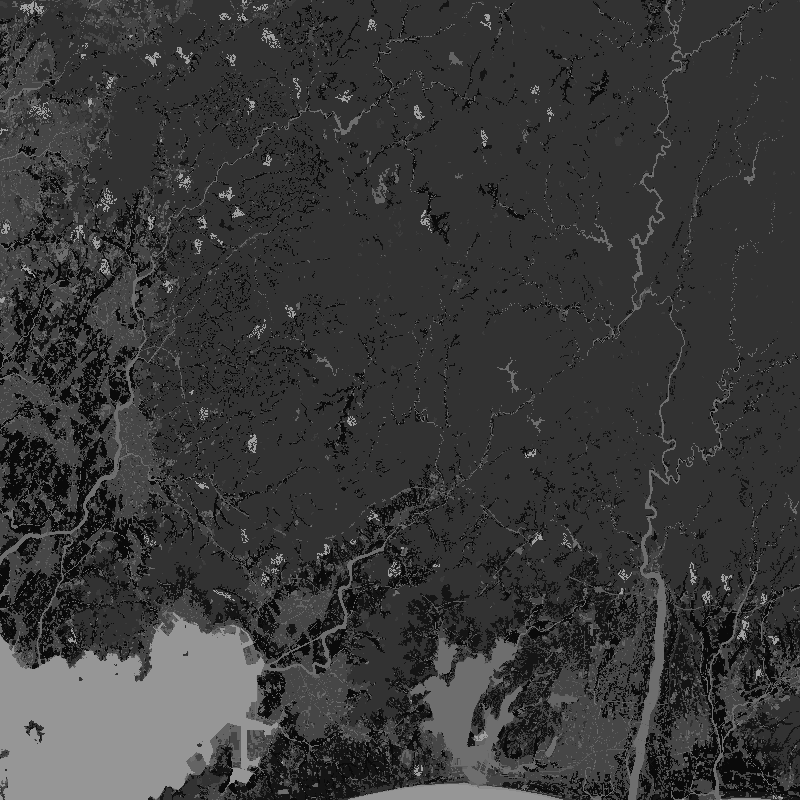

In [ ]:
from PIL import Image

Image.fromarray(dataset.read(1))

## １０－３ 地理空間データの操作

空間地理操作する方法を説明する。

ShapelyのPoint、LineString、Polygonクラスを利用してGrometricオブジェクトを生成する。

### １０－３－１ Geometricオブジェクト

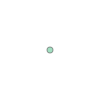

In [ ]:
# PointクラスからGeometricクラスへ
from shapely.geometry import Point

Point([1, 1])

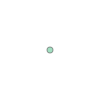

In [ ]:
# 地理的な座標を渡す場合
from shapely.geometry import Point

tokyo = Point(139.766667, 35.681111)
shinagawa = Point(139.738694, 35.628222)

shinagawa

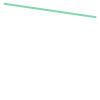

In [ ]:
# ライン処理の場合
from shapely.geometry import LineString

tokyo_shinjuku = LineString(
    [
        (139.766667, 35.681111),
        (139.700278, 35.690833)
    ]
)

tokyo_shinjuku

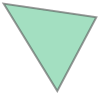

In [ ]:
# ポリゴンを処理する場合
from shapely.geometry import Polygon

tokyo_shinjuku_shinagawa = Polygon(
    [
        (139.766667, 35.681111),
        (139.700278, 35.690833),
        (139.738694, 35.628222)
    ]
)

tokyo_shinjuku_shinagawa

### １０－３－２ Geometricオブジェクトの属性

Geometricオブジェクトの型を確認する場合、geom_type型にアクセスする

In [ ]:
# 各種アクセス

print("tokyo：", tokyo.geom_type)
print("tokyo_shinjuku：", tokyo_shinjuku.geom_type)
print("tokyo_shinjuku.xy：", tokyo_shinjuku.xy)

tokyo： Point
tokyo_shinjuku： LineString
tokyo_shinjuku.xy： (array('d', [139.766667, 139.700278]), array('d', [35.681111, 35.690833]))


In [ ]:
# リスト変換
print(list(tokyo_shinjuku.coords))

# スライス
print(tokyo_shinjuku.coords[:1])

# 長さ取得
print("長さ：", tokyo_shinjuku.length)

# 面積
print("面積：", tokyo_shinjuku_shinagawa.area)

# 最小値、最大値
print("最小、最大：", tokyo_shinjuku.bounds)
print("最小、最大：", tokyo_shinjuku_shinagawa.bounds)

[(139.766667, 35.681111), (139.700278, 35.690833)]
[(139.766667, 35.681111)]
長さ： 0.06709706852763346
面積： 0.0018916006635003781
最小、最大： (139.700278, 35.681111, 139.766667, 35.690833)
最小、最大： (139.700278, 35.628222, 139.766667, 35.690833)


### １０－３－３ 距離の算出

Geometricオブジェクト間の距離を算出するには、distance()メソッドの引数にGeometricオブジェクトを渡す。

In [ ]:
tokyo.distance(shinagawa)

0.05983088709019954

Geometricオブジェクトから距離を算出したい場合、2次元平面上の座標として処理される。緯度経度から距離を算出する場合、原点と地面の基準を指定する必要である。

geopyを利用すると測地線距離または大円距離を使って2点間の距離を算出できる。GeoJSON等でも利用しているWSG84（EPSG:4326）がデフォルト値として使用される。

In [ ]:
from geopy import distance

tokyo_shinagawa_distance = distance.geodesic(
    list(reversed(tokyo.coords[0])),
    list(reversed(shinagawa.coords[0]))
)

# 大本
print(tokyo_shinagawa_distance)

print(tokyo_shinagawa_distance.meters)
print(tokyo_shinagawa_distance.km)

6.3915600283040455 km
6391.560028304046
6.3915600283040455


## １０－４ GeoPandas

GeoPandasは、Pythonで地理空間データを容易に操作できるPythonパッケージである。pandasのデータ型を拡張して、形や位置などの空間データを扱える。

### １０－４－１ GeoDataFrame

GeoDataFrameは、DataFrameを拡張したデータ型である。空間情報を持つGeoSeriesの列が含まれる。GeoSeriesの要素はShapelyのGeometricオブジェクトである。

国土交通省「国土数値情報ダウンロードサービス」からダウンロードしたGeoJSONファイルを読み込む（文字コードに気を付けて読み込むこと）。

https://nlftp.mlit.go.jp/ksj/gml/datalist/KsjTmplt-N03-v3_1.html#prefecture24

In [2]:
import geopandas as gpd

gdf = gpd.read_file("/content/drive/MyDrive/Colab Notebooks/DataScience/data/N03-20230101_23_GML/N03-23_23_230101.geojson")
gdf.head()

,N03_001,N03_002,N03_003,N03_004,N03_007,geometry
0,愛知県,None,名古屋市,名古屋市千種区,23101,"POLYGON ((136.98591 35.19263, 136.98596 35.192..."
1,愛知県,None,名古屋市,名古屋市東区,23102,"POLYGON ((136.90732 35.18609, 136.90744 35.186..."
2,愛知県,None,名古屋市,名古屋市北区,23103,"POLYGON ((136.92834 35.22500, 136.92827 35.224..."
3,愛知県,None,名古屋市,名古屋市西区,23104,"POLYGON ((136.90564 35.22510, 136.90570 35.225..."
4,愛知県,None,名古屋市,名古屋市中村区,23105,"POLYGON ((136.88166 35.17112, 136.88193 35.171..."


In [6]:
import geopandas as gpd

gdf = gpd.read_file("/content/drive/MyDrive/Colab Notebooks/DataScience/data/N03-20230101_23_GML/", encoding="shift-jis")
gdf.head()

,OBJECTID,N03_001,N03_002,N03_003,N03_004,N03_007,Shape_Leng,Shape_Area,geometry
0,1.0,愛知県,None,名古屋市,名古屋市千種区,23101,0.252724,0.001799,"POLYGON ((136.98591 35.19263, 136.98596 35.192..."
1,2.0,愛知県,None,名古屋市,名古屋市東区,23102,0.171465,0.000763,"POLYGON ((136.90732 35.18609, 136.90744 35.186..."
2,3.0,愛知県,None,名古屋市,名古屋市北区,23103,0.270773,0.001735,"POLYGON ((136.92834 35.22500, 136.92827 35.224..."
3,4.0,愛知県,None,名古屋市,名古屋市西区,23104,0.268895,0.001774,"POLYGON ((136.90564 35.22510, 136.90570 35.225..."
4,5.0,愛知県,None,名古屋市,名古屋市中村区,23105,0.212657,0.001612,"POLYGON ((136.88166 35.17112, 136.88193 35.171..."


### １０－４－２ .cxインデクサ

空間座標に特化したインデクサがある。添え字[経度、緯度]の形式で指定が可能であり、スライス記法も使える。

In [8]:
gdf.cx[136.8:136.9, 35.2:35.3]

,OBJECTID,N03_001,N03_002,N03_003,N03_004,N03_007,Shape_Leng,Shape_Area,geometry
2,3.0,愛知県,None,名古屋市,名古屋市北区,23103,0.270773,0.001735,"POLYGON ((136.92834 35.22500, 136.92827 35.224..."
3,4.0,愛知県,None,名古屋市,名古屋市西区,23104,0.268895,0.001774,"POLYGON ((136.90564 35.22510, 136.90570 35.225..."
26,27.0,愛知県,None,None,一宮市,23203,0.626722,0.011281,"POLYGON ((136.77464 35.36960, 136.77500 35.369..."
237,238.0,愛知県,None,None,江南市,23217,0.311941,0.002994,"POLYGON ((136.89462 35.37500, 136.89469 35.374..."
238,239.0,愛知県,None,None,小牧市,23219,0.650468,0.006224,"POLYGON ((137.04528 35.33702, 137.04526 35.336..."
239,240.0,愛知県,None,None,稲沢市,23220,0.579197,0.007858,"POLYGON ((136.82487 35.27585, 136.82473 35.275..."
253,254.0,愛知県,None,None,岩倉市,23228,0.163316,0.001037,"POLYGON ((136.87925 35.30081, 136.87990 35.300..."
899,900.0,愛知県,None,None,清須市,23233,0.287665,0.001717,"POLYGON ((136.84074 35.25184, 136.84088 35.251..."
900,901.0,愛知県,None,None,北名古屋市,23234,0.214781,0.001820,"POLYGON ((136.89167 35.26331, 136.89203 35.263..."
907,908.0,愛知県,None,None,あま市,23237,0.380512,0.002721,"POLYGON ((136.81888 35.21772, 136.81942 35.217..."


### １０－４－３ GeoSeriesの処理

GeoSeriesは、Seriesを拡張したデータ型である。地理空間データであるGeoSeriesは、「geometry」という列名でgeometry型としてGeoDataFrameに追加される。それ以外の列はpandasと同じデータ型で読み込まれる。

In [10]:
gdf.dtypes

OBJECTID       float64
N03_001         object
N03_002         object
N03_003         object
N03_004         object
N03_007         object
Shape_Leng     float64
Shape_Area     float64
geometry      geometry
dtype: object

## １０－５ 地理空間データの可視化

# 第１１章 データ可能のための線形代数